#1.Import data from github

In [1]:
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-10/PFW_2021_public.csv
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-10/PFW_count_site_data_public_2021.csv


--2026-02-23 23:20:53--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-10/PFW_2021_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704853 (14M) [text/plain]
Saving to: ‘PFW_2021_public.csv’

PFW_2021_public.csv 100%[===================>]  14.02M  --.-KB/s    in 0.1s    

2026-02-23 23:20:53 (107 MB/s) - ‘PFW_2021_public.csv’ saved [14704853/14704853]

--2026-02-23 23:20:53--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-10/PFW_count_site_data_public_2021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443...

#2.EDA for PFW_2021_public.csv

##(1)Description of the dataset about PFW_2021_public.csv

###Description：The dataset records specific event information from bird observations, with the core comprising the species observed and their numbers during each survey. It includes the time of each observation (year, month, day), geographical location (latitude, longitude, administrative region), effort expended by the observer (observation duration, snow depth), and a unique identifier and quality control status for each observation record. This dataset constitutes an observational-level record, directly reflecting ‘when, where, and how many birds of what species were observed’.

##(2)Data structure check

In [2]:
#1. Data size
import pandas as pd
df = pd.read_csv("/content/PFW_2021_public.csv")
print("Rows, Columns:", df.shape)

Rows, Columns: (100000, 22)


In [3]:
#2. The number of key IDs
print("Number of sites (loc_id):", df["loc_id"].nunique())
print("Number of checklists (sub_id):", df["sub_id"].nunique())
print("Number of species (species_code):", df["species_code"].nunique())

Number of sites (loc_id): 15287
Number of checklists (sub_id): 80913
Number of species (species_code): 361



Number of species in each observation (summary):
count    80913.000000
mean         1.235895
std          0.510112
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
dtype: float64


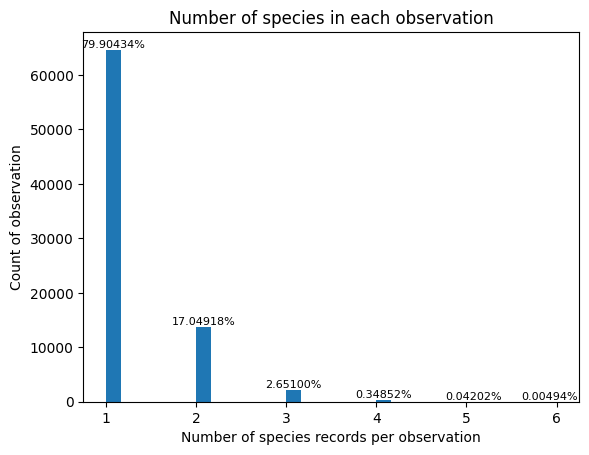

In [4]:
#3. Observe the distribution of how many distinct species are recorded within each checklist.
obs_per_checklist = df.groupby("sub_id").size()
print("\nNumber of species in each observation (summary):")
print(obs_per_checklist.describe())

# Plot
import numpy as np
import matplotlib.pyplot as plt
data = obs_per_checklist.values
total = len(data)
counts, bins, patches = plt.hist(data, bins=30)
plt.xlabel("Number of species records per observation")
plt.ylabel("Count of observation")
plt.title("Number of species in each observation")

for c, p in zip(counts, patches):
    if c > 0:
        percent = c / total * 100
        plt.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            f"{percent:.5f}%",
            ha="center",
            va="bottom",
            fontsize=8
        )
plt.show()

The distribution of the number of species observed in each checklist is shown in the figure above. On average, the number observations per checklist was 80,913.

Number of observations per site (summary):
count    15287.000000
mean         5.292929
std          3.525224
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         39.000000
Name: sub_id, dtype: float64


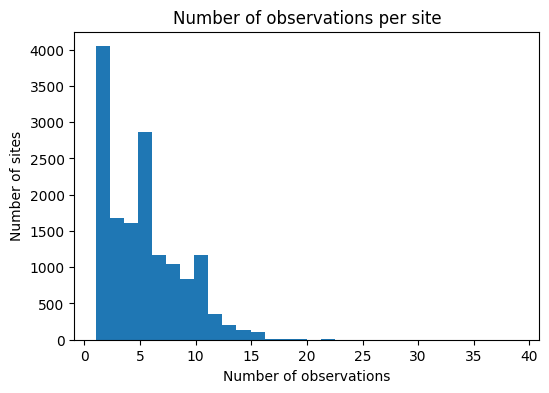

In [5]:
#4. How many checklists correspond to each location?
checklists_per_site = df.groupby("loc_id")["sub_id"].nunique()
print("Number of observations per site (summary):")
print(checklists_per_site.describe())

#Plot
plt.figure(figsize=(6,4))
plt.hist(checklists_per_site, bins=30)

plt.xlabel("Number of observations")
plt.ylabel("Number of sites")
plt.title("Number of observations per site")

plt.show()


The distribution of the number of checklists provided by each site is shown in the figure above. On average, each site provides 5.29 checklists.

In [6]:
#5. Check some locations contribute a large number of checklists (at the top of the list)
print("\nTop 10 sites by number of checklists:")
print(checklists_per_site.sort_values(ascending=False).head(10))


Top 10 sites by number of checklists:
loc_id
L3149107     39
L8142493     36
L3165662     34
L3275296     33
L5181157     32
L12707422    31
L12753440    30
L12797130    26
L13273022    23
L874984      23
Name: sub_id, dtype: int64


These sites rank among the top ten in the submission checklist, suggesting that they may host active bird populations or be frequented by researchers.

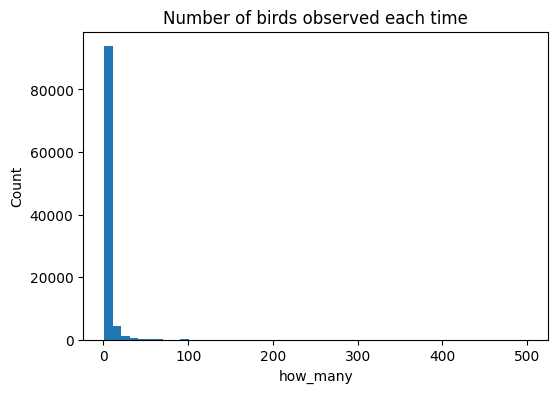

In [7]:
# Number of birds observed each time.
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df["how_many"], bins=50)
plt.xlabel("how_many")
plt.ylabel("Count")
plt.title("Number of birds observed each time")
plt.show()


##(3)Data quality check and preprocessing

In [8]:
# 1. Missing value rate check
missing_rate = df.isna().mean().sort_values(ascending=False)
print("Missing rate:")
print(missing_rate)

Missing rate:
snow_dep_atleast      0.08876
entry_technique       0.03433
effort_hrs_atleast    0.00161
longitude             0.00000
latitude              0.00000
loc_id                0.00000
sub_id                0.00000
subnational1_code     0.00000
obs_id                0.00000
Month                 0.00000
PROJ_PERIOD_ID        0.00000
species_code          0.00000
Day                   0.00000
Year                  0.00000
valid                 0.00000
how_many              0.00000
reviewed              0.00000
day1_am               0.00000
day2_am               0.00000
day1_pm               0.00000
day2_pm               0.00000
Data_Entry_Method     0.00000
dtype: float64


In [9]:
#2. Missing value fixing
df["snow_dep_atleast"] = df["snow_dep_atleast"].fillna(0)
df["entry_technique"] = df["entry_technique"].fillna("Unknown")
df["effort_hrs_atleast"] = df["effort_hrs_atleast"].fillna(df["effort_hrs_atleast"].median())

It is generally assumed that not writing down an estimated snow depth means there was no snowfall.  
Set the missing observation method category variable to a new value, "unknown".

In [10]:
#3. Double check the missing values
missing_rate = df.isna().mean().sort_values(ascending=False)
print("Missing rate:")
print(missing_rate)

Missing rate:
loc_id                0.0
latitude              0.0
longitude             0.0
subnational1_code     0.0
entry_technique       0.0
sub_id                0.0
obs_id                0.0
Month                 0.0
Day                   0.0
Year                  0.0
PROJ_PERIOD_ID        0.0
species_code          0.0
how_many              0.0
valid                 0.0
reviewed              0.0
day1_am               0.0
day1_pm               0.0
day2_am               0.0
day2_pm               0.0
effort_hrs_atleast    0.0
snow_dep_atleast      0.0
Data_Entry_Method     0.0
dtype: float64


In [11]:
#4. Remove unverified rows (valid = 0)
print("Before:", len(df))
df = df[df["valid"] == 1]
print("After :", len(df))

Before: 100000
After : 99344


In [12]:
#5. Distinguishing variable types

continuous = []
categorical = []
date_like = []

for col in df.columns:
    s = df[col]

    # 1. Explicit date-related fields (by column name)
    if col.lower() in ["year", "month", "day"]:
        date_like.append(col)
        continue

    # 2. Object (string) columns -> categorical
    if s.dtype == "object":
        categorical.append(col)
        continue

    # 3. Numeric columns: decide by number of unique values
    # Small number of unique values usually indicates categorical variables (e.g., 0/1, codes)
    nunique = s.nunique(dropna=True)

    if nunique <= 10:
        categorical.append(col)
    else:
        continuous.append(col)

print("Continuous numeric variables:")
print(continuous)

print("\nCategorical variables:")
print(categorical)

print("\nDate-related fields (to be combined into a timestamp):")
print(date_like)


Continuous numeric variables:
['latitude', 'longitude', 'how_many']

Categorical variables:
['loc_id', 'subnational1_code', 'entry_technique', 'sub_id', 'obs_id', 'PROJ_PERIOD_ID', 'species_code', 'valid', 'reviewed', 'day1_am', 'day1_pm', 'day2_am', 'day2_pm', 'effort_hrs_atleast', 'snow_dep_atleast', 'Data_Entry_Method']

Date-related fields (to be combined into a timestamp):
['Month', 'Day', 'Year']


In [13]:
#6. Transform time info into timestamp
time_cols = ["Year","Month","Day"]
if all(c in df.columns for c in time_cols):
    df["timestamp"] = pd.to_datetime(df[time_cols], errors="coerce")
    df = df.drop(columns=time_cols)
else:
    print("Year / Month / Day have transformed to timestamp")


In [14]:
#7. Outlier detection for continuous numeric variables
df[["latitude","longitude","how_many"]].quantile([0.001, 0.01, 0.99, 0.999]).T

,0.001,0.010,0.990,0.999
latitude,26.245115,29.495020,52.024806,61.119073
longitude,-149.681829,-123.485384,-68.417653,-62.426870
how_many,1.000000,1.000000,29.000000,65.000000


latitude: 4904 outliers
longitude: 9897 outliers
how_many: 8311 outliers


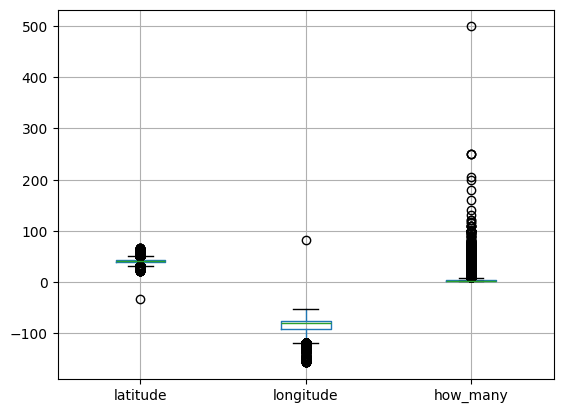

In [15]:
cols = ["latitude", "longitude", "how_many"]

for col in cols:
    s = df[col].dropna()

    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    n_out = ((s < lower) | (s > upper)).sum()
    print(f"{col}: {n_out} outliers")
df[["latitude","longitude","how_many"]].boxplot()
plt.show()

Most continuous numerical values ​​are acceptable.

In [16]:
# Check for extreme values
cols = ["latitude", "longitude", "how_many"]

extreme_points = []

for col in cols:
    s = df[col]

    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    out = df[(s < lower) | (s > upper)].copy()

    if out.empty:
        continue

    out["extreme_distance"] = out[col].apply(
        lambda x: max(lower - x, x - upper)
    )

    extreme_points.append(
        out.sort_values("extreme_distance", ascending=False).head(1)
    )

extreme_df = pd.concat(extreme_points)

extreme_df[["loc_id", "latitude", "longitude", "how_many"]]


,loc_id,latitude,longitude,how_many
4853,L10143380,-33.137551,81.826172,1
4853,L10143380,-33.137551,81.826172,1
23976,L4091750,42.696995,-108.705400,500


Delete the observation data from the islands on the west coast of the South Pacific

In [17]:
before = len(df)
df = df[df["loc_id"] != "L10143380"]
after = len(df)
print("Removed rows:", before - after)

Removed rows: 1


In [18]:
out_path = "PFW_OBS_clean.csv"
df.to_csv(out_path, index=False, encoding="utf-8")

##(4)Spatial distribution trends of different bird species

In [19]:
# Check area
df[["latitude", "longitude"]].agg(["min", "max"])

,latitude,longitude
min,21.422854,-157.949318
max,65.519890,-52.733096


In [20]:
# Select one of the speices_code in next block
df["species_code"].unique()

array(['amegfi', 'moudov', 'tuftit', 'houspa', 'balori', 'norcar',
       'pinsis', 'whtspa', 'pingro', 'rewbla', 'dowwoo', 'orejun',
       'yerwar', 'eursta', 'annhum', 'whcspa', 'whbnut', 'coshum',
       'reshaw', 'haiwoo', 'orcwar', 'bkcchi', 'easblu', 'amerob',
       'y00033', 'pilwoo', 'varthr', 'rebnut', 'chispa', 'daejun',
       'rebwoo', 'stejay', 'blujay', 'bnhcow', 'carwre', 'herthr',
       'rethaw', 'chbchi', 'houfin', 'calqua', 'carchi', 'monpar',
       'foxspa', 'eucdov', 'mouchi', 'pinwar', 'amecro', 'amtspa',
       'normoc', 'rocpig1', 'norfli', 'lesgol', 'grycat', 'spotow',
       'gilwoo', 'gryjay', 'caltow', 'paibun', 'sonspa', 'yebsap',
       'coohaw', 'btywar', 'comrav', 'wlswar', 'cowscj1', 'brnthr',
       'borchi2', 'brncre', 'pygnut', 'juntit1', 'bewwre', 'purfin',
       'eastow', 'comgra', 'bkbmag1', 'rufhum', 'comred', 'hoared',
       'clanut', 'wiltur', 'yetwar', 'larspa', 'whwdov', 'acowoo',
       'robgro', 'fiscro', 'blkpho', 'wooscj2', 'phaino',

In [21]:
!pip -q install plotly

import json
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from urllib.request import urlopen

# Settings
# Choose ONE species to search
SPECIES = "acowoo"   # <- change to your target species_code

# 0 Load observation data
df = pd.read_csv("/content/PFW_OBS_clean.csv")
df = df[df["valid"] == 1].copy()

# subnational1_code like "US-CA", "CA-ON", sometimes "XX"
df = df[df["subnational1_code"].notna()]
df = df[df["subnational1_code"].str.contains("-", na=False)]
df = df[~df["subnational1_code"].str.startswith("XX", na=False)]


# 1 Load North America admin-1 boundaries (US states + Canada provinces/territories) via Natural Earth GeoJSON
#    (Worldwide file; we'll filter to US/CA)
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_50m_admin_1_states_provinces.geojson"
with urlopen(geojson_url) as f:
    gj = json.load(f)

# Keep only US/CA features that have iso_3166_2 (e.g., "US-CA", "CA-ON")
features = []
for feat in gj["features"]:
    props = feat.get("properties", {})
    iso2 = props.get("iso_3166_2")
    if iso2 and (iso2.startswith("US-") or iso2.startswith("CA-")):
        features.append(feat)

na_geojson = {"type":"FeatureCollection", "features":features}


# 2 Assign each state/province to the 6 regions (edit if you want different grouping)
region_map = {
    # --- US ---
    "US-AK":"Far North",

    "US-WA":"Northwest","US-OR":"Northwest","US-ID":"Northwest","US-MT":"Northwest",

    "US-CA":"Southwest","US-NV":"Southwest","US-AZ":"Southwest","US-NM":"Southwest","US-UT":"Southwest","US-CO":"Southwest",

    "US-ND":"Central","US-SD":"Central","US-NE":"Central","US-KS":"Central",
    "US-MN":"Central","US-IA":"Central","US-MO":"Central","US-WI":"Central",
    "US-IL":"Central","US-MI":"Central","US-IN":"Central","US-OH":"Central",

    "US-ME":"Northeast","US-NH":"Northeast","US-VT":"Northeast","US-MA":"Northeast","US-RI":"Northeast","US-CT":"Northeast",
    "US-NY":"Northeast","US-NJ":"Northeast","US-PA":"Northeast",

    "US-DE":"Southeast","US-MD":"Southeast","US-DC":"Southeast","US-VA":"Southeast","US-WV":"Southeast","US-NC":"Southeast","US-SC":"Southeast",
    "US-GA":"Southeast","US-FL":"Southeast","US-KY":"Southeast","US-TN":"Southeast","US-AL":"Southeast","US-MS":"Southeast",
    "US-AR":"Southeast","US-LA":"Southeast","US-OK":"Southeast","US-TX":"Southeast",

    # --- Canada (rough grouping to match the example-style regions) ---
    "CA-YT":"Far North","CA-NT":"Far North","CA-NU":"Far North",

    "CA-BC":"Northwest",

    "CA-AB":"Central","CA-SK":"Central","CA-MB":"Central",

    "CA-ON":"Northeast","CA-QC":"Northeast","CA-NB":"Northeast","CA-NS":"Northeast","CA-PE":"Northeast","CA-NL":"Northeast"
}
df["region"] = df["subnational1_code"].map(region_map).fillna("Central")

region_order = ["Far North","Northwest","Southwest","Central","Northeast","Southeast"]
region_to_z = {r:i for i,r in enumerate(region_order)}
region_colors = ["#7D5BA6", "#16B6C6", "#E78AC3", "#33A02C", "#F28E2B", "#D62728"]  # 6 discrete colors

# Region bubble anchor points (rough centers; include Canada)
region_centers = {
    "Far North":  (64.0, -110.0),
    "Northwest":  (53.0, -125.0),
    "Southwest":  (34.0, -112.0),
    "Central":    (49.0,  -97.0),
    "Northeast":  (46.0,  -71.0),
    "Southeast":  (32.5,  -84.0),
}


# 3 Metrics (ALL time; spatial only)
#    Left: % feeders visited = (# unique sites where species appears) / (# unique sites) by region
#    Right: avg flock size when present (mean how_many), aggregated by region (site-level then region-level)

# total unique sites by region
sites_all = df.groupby("region")["loc_id"].nunique().rename("n_sites_all")

# species-present subset
df_sp = df[df["species_code"] == SPECIES].copy()
sites_sp = df_sp.groupby("region")["loc_id"].nunique().rename("n_sites_sp")

metrics = pd.concat([sites_all, sites_sp], axis=1).fillna(0)
metrics["pct_feeders_visited"] = np.where(metrics["n_sites_all"] > 0,
                                         metrics["n_sites_sp"] / metrics["n_sites_all"] * 100, 0)

# avg flock size: mean within site -> mean across sites
loc_mean = df_sp.groupby(["region","loc_id"])["how_many"].mean().rename("loc_mean_how_many").reset_index()
avg_flock = loc_mean.groupby("region")["loc_mean_how_many"].mean().rename("avg_flock_size")

metrics = metrics.join(avg_flock).fillna({"avg_flock_size":0}).reset_index()
metrics["lat"] = metrics["region"].map(lambda r: region_centers[r][0])
metrics["lon"] = metrics["region"].map(lambda r: region_centers[r][1])


# 4 Admin-1 polygons colored by region (US states + Canada provinces/territories)
# Build a table of all admin-1 units we can map
admin_units = []
for feat in na_geojson["features"]:
    iso2 = feat["properties"]["iso_3166_2"]  # "US-CA" / "CA-ON"
    admin_units.append(iso2)
admin_units = pd.Series(admin_units, name="subnational1_code").to_frame()

admin_units["region"] = admin_units["subnational1_code"].map(region_map).fillna("Central")
admin_units["z"] = admin_units["region"].map(region_to_z)


# 5 Plot
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type":"choropleth"}, {"type":"choropleth"}]],
    subplot_titles=("Percent Feeders Visited", "Average Flock Size")
)

for col_i, metric_col, label_fmt, size_expr in [
    (1, "pct_feeders_visited", lambda x: f"{x:.1f}%", lambda x: np.clip(x, 10, 60)),
    (2, "avg_flock_size",      lambda x: f"{x:.3g}",  lambda x: np.clip(x*8, 10, 60)),
]:
    fig.add_trace(
        go.Choropleth(
            geojson=na_geojson,
            featureidkey="properties.iso_3166_2",
            locations=admin_units["subnational1_code"],
            z=admin_units["z"],
            zmin=0, zmax=5,
            colorscale=region_colors,
            showscale=False,
            marker_line_width=0.6
        ),
        row=1, col=col_i
    )

    fig.add_trace(
        go.Scattergeo(
            lon=metrics["lon"], lat=metrics["lat"],
            mode="markers+text",
            text=metrics[metric_col].map(label_fmt),
            textposition="middle center",
            marker=dict(size=size_expr(metrics[metric_col]), opacity=0.35),
            showlegend=False
        ),
        row=1, col=col_i
    )

fig.update_geos(
    scope="north america",
    projection_type="albers",

)



fig.update_layout(
    title=f"{SPECIES} — US + Canada （2020-11-13 to 2021-04-30）",
    height=620, width=1250,
    margin=dict(l=10, r=10, t=70, b=10)
)

fig.show()



##(5)Time distribution trends of different bird species

In [22]:
# Check timeline
time_cols = ["Year","Month","Day"]
if all(c in df.columns for c in time_cols):
    df["timestamp"] = pd.to_datetime(df[time_cols], errors="coerce")
    df = df.drop(columns=time_cols)
else:
    print("Year / Month / Day have transformed to timestamp")

print("Min timestamp:", df["timestamp"].min())
print("Max timestamp:", df["timestamp"].max())

Year / Month / Day have transformed to timestamp
Min timestamp: 2020-11-13
Max timestamp: 2021-04-30


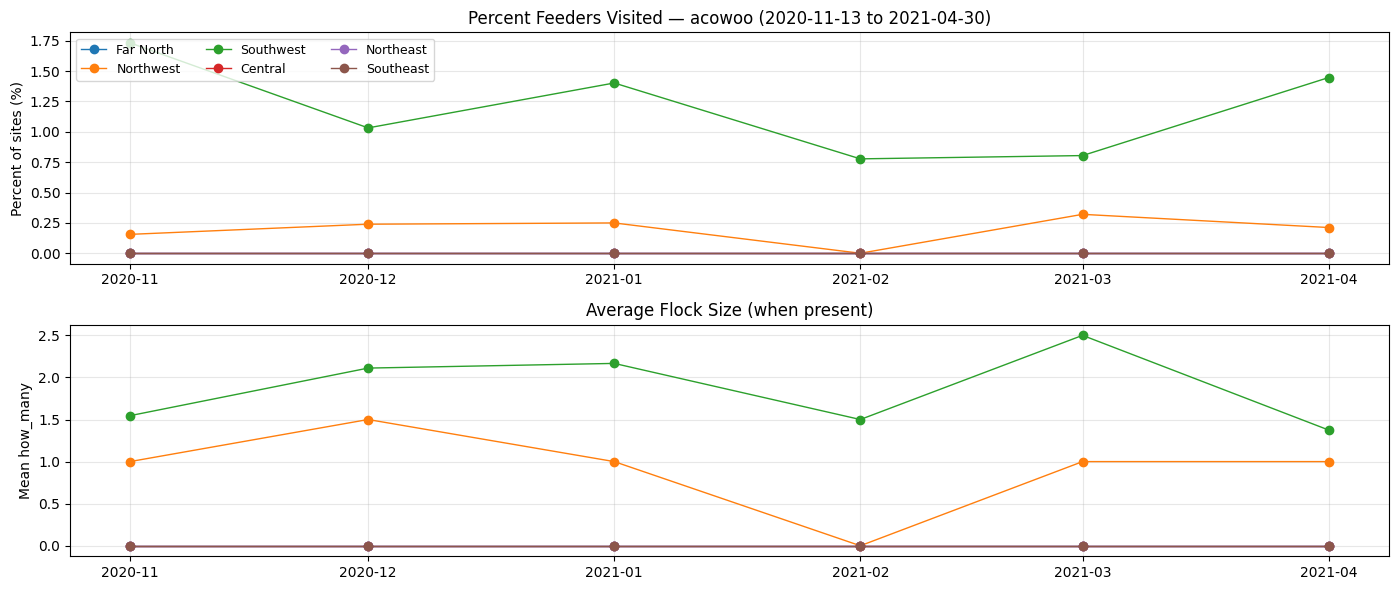

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Settings

SPECIES = "acowoo"   # change to your species_code
FREQ = "M"       # "M"=monthly, "W"=weekly, "D"=daily


# Load and clean

df = pd.read_csv("/content/PFW_2021_public.csv")
df = df[df["valid"] == 1].copy()

df["date"] = pd.to_datetime(df[["Year", "Month", "Day"]], errors="coerce")
df = df.dropna(subset=["date"])

df = df[df["subnational1_code"].notna()]
df = df[df["subnational1_code"].str.contains("-", na=False)]
df = df[df["subnational1_code"] != "XX-"].copy()


# Region mapping (US + Canada)

region_map = {
    # US
    "US-AK": "Far North",
    "US-WA": "Northwest", "US-OR": "Northwest", "US-ID": "Northwest", "US-MT": "Northwest",
    "US-CA": "Southwest", "US-NV": "Southwest", "US-AZ": "Southwest", "US-NM": "Southwest", "US-UT": "Southwest", "US-CO": "Southwest",
    "US-ND": "Central", "US-SD": "Central", "US-NE": "Central", "US-KS": "Central",
    "US-MN": "Central", "US-IA": "Central", "US-MO": "Central", "US-WI": "Central",
    "US-IL": "Central", "US-MI": "Central", "US-IN": "Central", "US-OH": "Central",
    "US-ME": "Northeast", "US-NH": "Northeast", "US-VT": "Northeast", "US-MA": "Northeast",
    "US-RI": "Northeast", "US-CT": "Northeast", "US-NY": "Northeast", "US-NJ": "Northeast", "US-PA": "Northeast",
    "US-DE": "Southeast", "US-MD": "Southeast", "US-DC": "Southeast", "US-VA": "Southeast", "US-WV": "Southeast",
    "US-NC": "Southeast", "US-SC": "Southeast", "US-GA": "Southeast", "US-FL": "Southeast",
    "US-KY": "Southeast", "US-TN": "Southeast", "US-AL": "Southeast", "US-MS": "Southeast",
    "US-AR": "Southeast", "US-LA": "Southeast", "US-OK": "Southeast", "US-TX": "Southeast",

    # Canada
    "CA-YT": "Far North", "CA-NT": "Far North", "CA-NU": "Far North",
    "CA-BC": "Northwest",
    "CA-AB": "Central", "CA-SK": "Central", "CA-MB": "Central",
    "CA-ON": "Northeast", "CA-QC": "Northeast", "CA-NB": "Northeast",
    "CA-NS": "Northeast", "CA-PE": "Northeast", "CA-NL": "Northeast",
}

region_order = ["Far North", "Northwest", "Southwest", "Central", "Northeast", "Southeast"]
df["region"] = df["subnational1_code"].map(region_map).fillna("Central")


# Time bucketing

if FREQ == "M":
    df["t"] = df["date"].dt.to_period("M").dt.to_timestamp()
elif FREQ == "W":
    df["t"] = df["date"].dt.to_period("W").apply(lambda p: p.start_time)
else:
    df["t"] = df["date"].dt.floor("D")


# Metric 1: Percent feeders visited (site coverage)
#   numerator: unique sites where species appears (by time & region)
#   denominator: unique sites observed (by time & region)

sites_all = df.groupby(["t", "region"])["loc_id"].nunique().rename("n_sites_all")

df_sp = df[df["species_code"] == SPECIES].copy()
sites_sp = df_sp.groupby(["t", "region"])["loc_id"].nunique().rename("n_sites_sp")

m = pd.concat([sites_all, sites_sp], axis=1).fillna(0)
m["pct_feeders_visited"] = np.where(
    m["n_sites_all"] > 0,
    (m["n_sites_sp"] / m["n_sites_all"]) * 100,
    0
)


# Metric 2: Average flock size when present
#   compute mean how_many within site first, then average across sites
loc_mean = (
    df_sp.groupby(["t", "region", "loc_id"])["how_many"]
    .mean()
    .rename("loc_mean_how_many")
    .reset_index()
)

avg_flock = (
    loc_mean.groupby(["t", "region"])["loc_mean_how_many"]
    .mean()
    .rename("avg_flock_size")
)

m = m.join(avg_flock).fillna({"avg_flock_size": 0}).reset_index()

p1 = m.pivot(index="t", columns="region", values="pct_feeders_visited").reindex(columns=region_order)
p2 = m.pivot(index="t", columns="region", values="avg_flock_size").reindex(columns=region_order)


# Plot
start_date = df["date"].min().date()
end_date = df["date"].max().date()

plt.figure(figsize=(14, 6))

ax1 = plt.subplot(2, 1, 1)
for r in region_order:
    ax1.plot(p1.index, p1[r], marker="o", linewidth=1)
ax1.set_title(f"Percent Feeders Visited — {SPECIES} ({start_date} to {end_date})")
ax1.set_ylabel("Percent of sites (%)")
ax1.grid(True, alpha=0.3)
ax1.legend(region_order, ncol=3, fontsize=9, loc="upper left")

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
for r in region_order:
    ax2.plot(p2.index, p2[r], marker="o", linewidth=1)
ax2.set_title("Average Flock Size (when present)")
ax2.set_ylabel("Mean how_many")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


##(6)Frequency distribution of different bird species in different months



In [24]:
import pandas as pd

# Load and basic cleaning

df = pd.read_csv("/content/PFW_2021_public.csv")

df = df[df["valid"] == 1].copy()

df = df[df["subnational1_code"].notna()]
df = df[df["subnational1_code"].str.contains("-", na=False)]
df = df[df["subnational1_code"] != "XX"]


# Build date and month
df["date"] = pd.to_datetime(df[["Year","Month","Day"]], errors="coerce")
df = df.dropna(subset=["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)


# Region mapping
region_map = {
    "US-AK":"Far North",

    "US-WA":"Northwest","US-OR":"Northwest","US-ID":"Northwest","US-MT":"Northwest",

    "US-CA":"Southwest","US-NV":"Southwest","US-AZ":"Southwest","US-NM":"Southwest","US-UT":"Southwest","US-CO":"Southwest",

    "US-ND":"Central","US-SD":"Central","US-NE":"Central","US-KS":"Central",
    "US-MN":"Central","US-IA":"Central","US-MO":"Central","US-WI":"Central",
    "US-IL":"Central","US-MI":"Central","US-IN":"Central","US-OH":"Central",

    "US-ME":"Northeast","US-NH":"Northeast","US-VT":"Northeast","US-MA":"Northeast",
    "US-RI":"Northeast","US-CT":"Northeast","US-NY":"Northeast","US-NJ":"Northeast","US-PA":"Northeast",

    "US-DE":"Southeast","US-MD":"Southeast","US-DC":"Southeast","US-VA":"Southeast","US-WV":"Southeast",
    "US-NC":"Southeast","US-SC":"Southeast","US-GA":"Southeast","US-FL":"Southeast",
    "US-KY":"Southeast","US-TN":"Southeast","US-AL":"Southeast","US-MS":"Southeast",
    "US-AR":"Southeast","US-LA":"Southeast","US-OK":"Southeast","US-TX":"Southeast",

    "CA-YT":"Far North","CA-NT":"Far North","CA-NU":"Far North",
    "CA-BC":"Northwest",
    "CA-AB":"Central","CA-SK":"Central","CA-MB":"Central",
    "CA-ON":"Northeast","CA-QC":"Northeast","CA-NB":"Northeast",
    "CA-NS":"Northeast","CA-PE":"Northeast","CA-NL":"Northeast"
}

df["region"] = df["subnational1_code"].map(region_map).fillna("Central")


# Count species frequency
# per month × region
#
counts = (
    df
    .groupby(["month", "region", "species_code"])
    .size()
    .reset_index(name="n_records")
)

# Top 5 species per month × region

top5 = (
    counts
    .sort_values(["month", "region", "n_records"], ascending=[True, True, False])
    .groupby(["month", "region"])
    .head(5)
    .reset_index(drop=True)
)

from IPython.display import display
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 200)

display(top5)


,month,region,species_code,n_records
0,2020-11,Central,norcar,174
1,2020-11,Central,blujay,167
2,2020-11,Central,dowwoo,167
3,2020-11,Central,bkcchi,160
4,2020-11,Central,whbnut,151
5,2020-11,Far North,dowwoo,5
6,2020-11,Far North,pingro,4
7,2020-11,Far North,bkbmag1,3
8,2020-11,Far North,rebnut,3
9,2020-11,Far North,bkcchi,2


##(7)The impact of effort bias on the results

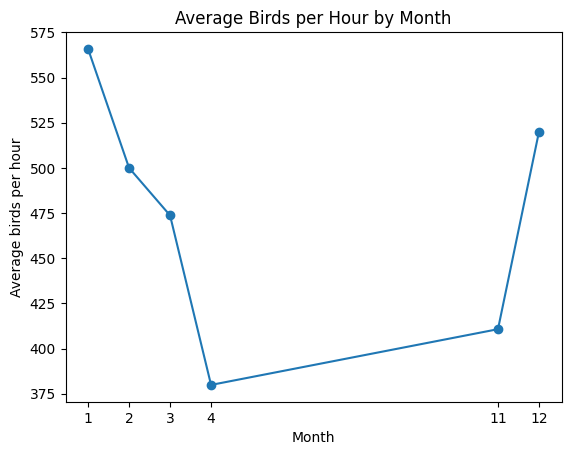

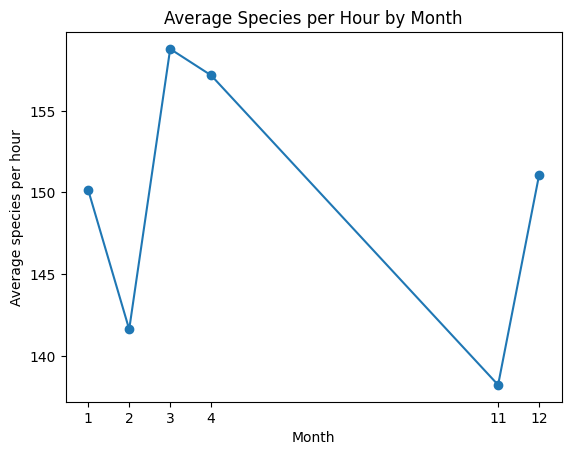

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("/content/PFW_2021_public.csv")

# 2) Keep valid observations + avoid division by 0
df = df[(df["valid"] == 1) & (df["effort_hrs_atleast"] > 0)]

# 3) Aggregate to checklist level (sub_id)
# Each sub_id = one checklist (one survey session)
checklist = (
    df.groupby("sub_id")
      .agg(
          total_birds=("how_many", "sum"),          # total birds seen in the checklist
          n_species=("species_code", "nunique"),    # number of unique species in the checklist
          effort_hours=("effort_hrs_atleast", "first"),
          Month=("Month", "first")
      )
      .reset_index()
)

# 4) Standardize by effort (control effort bias)
checklist["birds_per_hour"] = checklist["total_birds"] / checklist["effort_hours"]
checklist["species_per_hour"] = checklist["n_species"] / checklist["effort_hours"]

# 5) Monthly mean trends
monthly = (
    checklist.groupby("Month")[["birds_per_hour", "species_per_hour"]]
             .mean()
             .reset_index()
             .sort_values("Month")
)

# 6) Plot 1: Average birds per hour by month
plt.figure()
plt.plot(monthly["Month"], monthly["birds_per_hour"], marker="o")
plt.xlabel("Month")
plt.ylabel("Average birds per hour")
plt.title("Average Birds per Hour by Month")
plt.xticks(sorted(monthly["Month"].unique()))
plt.show()

# 7) Plot 2: Average species per hour by month
plt.figure()
plt.plot(monthly["Month"], monthly["species_per_hour"], marker="o")
plt.xlabel("Month")
plt.ylabel("Average species per hour")
plt.title("Average Species per Hour by Month")
plt.xticks(sorted(monthly["Month"].unique()))
plt.show()


To control for observation effort, we normalize both bird counts and species richness by survey duration and analyze birds per hour and species per hour instead of raw counts.

##(8)Species richness vs. diversity (Shannon index)

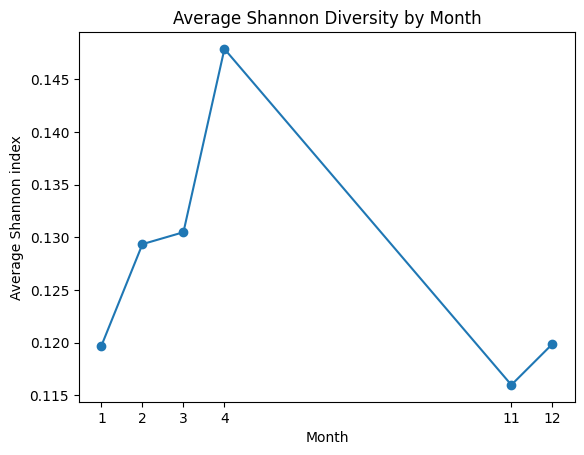

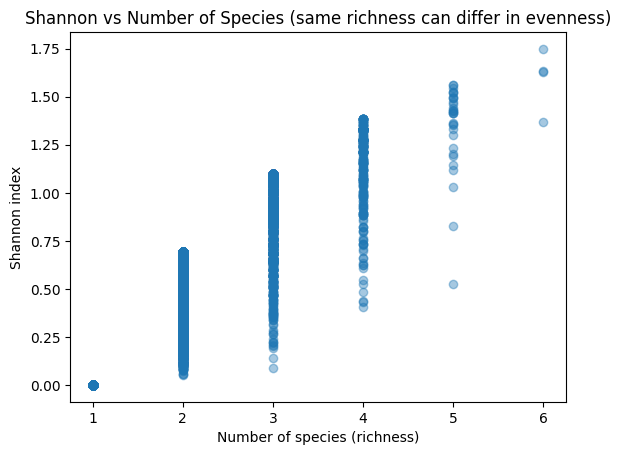

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1) Load & basic cleaning
df = pd.read_csv("/content/PFW_2021_public.csv")

# Keep valid + remove zero/negative effort if you later want "per hour" metrics
df = df[(df["valid"] == 1)].copy()

# how_many might have missing; treat missing as 0 (or drop)
df["how_many"] = pd.to_numeric(df["how_many"], errors="coerce").fillna(0)

# 2) Build species counts per checklist
#    Each row: (sub_id, species_code) total individuals in that checklist

sp_counts = (
    df.groupby(["sub_id", "species_code", "Month"], as_index=False)
      .agg(species_count=("how_many", "sum"),
           effort_hours=("effort_hrs_atleast", "first"))
)

# total individuals per checklist
totals = (
    sp_counts.groupby("sub_id", as_index=False)
             .agg(total_birds=("species_count", "sum"))
)

sp_counts = sp_counts.merge(totals, on="sub_id", how="left")

# avoid divide-by-zero: drop checklists with 0 total birds
sp_counts = sp_counts[sp_counts["total_birds"] > 0].copy()

# p_i = species proportion within checklist
sp_counts["p_i"] = sp_counts["species_count"] / sp_counts["total_birds"]


# 3) Shannon & Simpson per checklist
#    Shannon: -Σ p_i * ln(p_i)
#    Simpson (Gini-Simpson): 1 - Σ p_i^2

diversity = (
    sp_counts.groupby("sub_id", as_index=False)
             .agg(
                 Month=("Month", "first"),
                 effort_hours=("effort_hours", "first"),
                 n_species=("species_code", "nunique"),
                 shannon=("p_i", lambda x: -np.sum(x * np.log(x))),
                 simpson=("p_i", lambda x: 1 - np.sum(x**2)),
                 total_birds=("total_birds", "first")
             )
)

# (Optional) If you also want effort-standardized richness
diversity = diversity[(diversity["effort_hours"] > 0)].copy()
diversity["species_per_hour"] = diversity["n_species"] / diversity["effort_hours"]
diversity["birds_per_hour"] = diversity["total_birds"] / diversity["effort_hours"]

# 4) Visualization A: Monthly mean trends
monthly = (
    diversity.groupby("Month")[["shannon", "simpson", "n_species"]]
             .mean()
             .reset_index()
             .sort_values("Month")
)

plt.figure()
plt.plot(monthly["Month"], monthly["shannon"], marker="o")
plt.xlabel("Month")
plt.ylabel("Average Shannon index")
plt.title("Average Shannon Diversity by Month")
plt.xticks(sorted(monthly["Month"].unique()))
plt.show()



# 5) Visualization B: Why it matters
#    Same n_species can have different Shannon

plt.figure()
plt.scatter(diversity["n_species"], diversity["shannon"], alpha=0.4)
plt.xlabel("Number of species (richness)")
plt.ylabel("Shannon index")
plt.title("Shannon vs Number of Species (same richness can differ in evenness)")
plt.show()


For the same species richness, the Shannon index varies substantially, indicating that community evenness differs across checklists.

#3.EDA for PFW_count_site_data_public_2021

##(1)Description of the dataset about PFW_count_site_data_public_2021.csv

###Description：The dataset describes the static environmental and facility characteristics of bird observation sites, with a core focus on habitat types and human management practices at survey locations. It details each site's courtyard type, surrounding habitat composition (such as woodland, grassland, and water bodies), vegetation and water availability, feeder types and quantities, alongside factors potentially influencing bird activity (such as the frequency of cats, dogs, and squirrels) and feeding habits. This dataset comprises site-level attribute data, serving to contextualise the environmental and anthropogenic factors underlying bird observation results.

##(2)Data structure check

In [27]:
import pandas as pd
df = pd.read_csv("/content/PFW_count_site_data_public_2021.csv")
print("Rows, Columns:", df.shape)

Rows, Columns: (254355, 62)


In [28]:
df.dtypes

,0
loc_id,object
proj_period_id,object
yard_type_pavement,float64
yard_type_garden,float64
yard_type_landsca,float64
yard_type_woods,float64
yard_type_desert,float64
hab_dcid_woods,float64
hab_evgr_woods,float64
hab_mixed_woods,float64


In [29]:
import pandas as pd

df = pd.read_csv("/content/PFW_count_site_data_public_2021.csv")

# Show unique values (and counts) for each column
for col in df.columns:
    print("=" * 60)
    print(f"Column: {col}")
    print("Number of unique values:", df[col].nunique(dropna=True))

    # Show value counts (including NaN)
    print(df[col].value_counts(dropna=False))


Column: loc_id
Number of unique values: 91105
loc_id
L36031       33
L33888       33
L22111       33
L33282       32
L33190       32
             ..
L34380        1
L34378        1
L34376        1
L3437550      1
L13437971     1
Name: count, Length: 91105, dtype: int64
Column: proj_period_id
Number of unique values: 33
proj_period_id
PFW_2021    13222
PFW_2020    11262
PFW_2015    10516
PFW_2016    10484
PFW_2017    10346
PFW_2019    10320
PFW_2018    10257
PFW_2014    10193
PFW_2003     9496
PFW_2002     9342
PFW_2001     9198
PFW_2004     9173
PFW_2005     9120
PFW_2000     8651
PFW_2013     8357
PFW_1999     7199
PFW_2012     7001
PFW_2011     6930
PFW_2006     6688
PFW_2008     6669
PFW_1998     6605
PFW_2007     6500
PFW_2010     6221
PFW_2009     6164
PFW_1995     5917
PFW_1997     5669
PFW_1996     5470
PFW_1990     5013
PFW_1994     4760
PFW_1993     4543
PFW_1989     4492
PFW_1992     4320
PFW_1991     4257
Name: count, dtype: int64
Column: yard_type_pavement
Number of unique 

##(3)Data quality check and preprocessing

Group the columns

In [30]:
import pandas as pd

df = pd.read_csv("/content/PFW_count_site_data_public_2021.csv")

# Manually categorize each variable

# ① Feeders identifiers
id_cols = ["loc_id", "proj_period_id"]

# ② Yard / site type variables
yard_cols = [c for c in df.columns if c.startswith("yard_type_")]

# ③ Habitat type variables
hab_cols = [c for c in df.columns if c.startswith("hab_")]

# ④ Vegetation and environmental count variables (minimum counts, *_atleast)
environment_cols = [c for c in df.columns if c.endswith("_atleast")] + [
    "nearby_feeders", "housing_density"
]

# ⑤ Disturbance / human and animal activity variables
disturbance_cols = ["squirrels", "cats", "dogs", "humans"]

# ⑥ Feeding behavior over time (year-round and monthly indicators)
feeding_time_cols = ["fed_yr_round"] + [
    c for c in df.columns if c.startswith("fed_in_")
]

# ⑦ Feeder type and quantity variables
feeder_cols = [c for c in df.columns if c.startswith("numfeeders_")]


# Store all variable groups in a dictionary for convenient EDA
feature_groups = {
    "identifiers": id_cols,
    "yard_type": yard_cols,
    "habitat": hab_cols,
    "environment": environment_cols,
    "disturbance": disturbance_cols,
    "feeding_time": feeding_time_cols,
    "num_diff_types_feeder": feeder_cols
}

# Quick check: number of variables in each group
for k, v in feature_groups.items():
    print(k, len(v))


identifiers 2
yard_type 5
habitat 14
environment 13
disturbance 4
feeding_time 13
num_diff_types_feeder 11


In [31]:
print("identifiers", id_cols)
print("yard:", yard_cols)
print("hab:", hab_cols)
print("environment:", environment_cols)
print("disturbance:", disturbance_cols)
print("feeding time:", feeding_time_cols)
print("num_diff_types_feeder:", feeder_cols)



identifiers ['loc_id', 'proj_period_id']
yard: ['yard_type_pavement', 'yard_type_garden', 'yard_type_landsca', 'yard_type_woods', 'yard_type_desert']
hab: ['hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard', 'hab_park', 'hab_water_fresh', 'hab_water_salt', 'hab_residential', 'hab_industrial', 'hab_agricultural', 'hab_desert_scrub', 'hab_young_woods', 'hab_swamp', 'hab_marsh']
environment: ['evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast', 'water_srcs_atleast', 'bird_baths_atleast', 'population_atleast', 'count_area_size_sq_m_atleast', 'nearby_feeders', 'housing_density']
disturbance: ['squirrels', 'cats', 'dogs', 'humans']
feeding time: ['fed_yr_round', 'fed_in_jan', 'fed_in_feb', 'fed_in_mar', 'fed_in_apr', 'fed_in_may', 'fed_in_jun', 'fed_in_jul', 'fed_in_aug', 'fed_in_sep', 'fed_in_oct', 'fed_in_nov', 'fed_in_dec']
num_diff_types_feeder: ['numfeeders_suet', 'numfeeders

Check missing value rate by group

In [32]:
# Missing value summary by variable group
group_missing_summary = {}

for group_name, cols in feature_groups.items():
    sub_df = df[cols]

    group_missing_summary[group_name] = pd.DataFrame({
        "missing_count": sub_df.isna().sum(),
        "missing_rate": (sub_df.isna().sum() / len(df)).round(4)
    }).sort_values("missing_rate", ascending=False)

# Print missing values for each group
for group_name, miss_df in group_missing_summary.items():
    print("=" * 80)
    print(f"Group: {group_name}")
    display(miss_df)

Group: identifiers


,missing_count,missing_rate
loc_id,0,0.0
proj_period_id,0,0.0


Group: yard_type


,missing_count,missing_rate
yard_type_pavement,68877,0.2708
yard_type_desert,68782,0.2704
yard_type_garden,68282,0.2685
yard_type_woods,67628,0.2659
yard_type_landsca,63017,0.2478


Group: habitat


,missing_count,missing_rate
hab_park,116534,0.4582
hab_swamp,115086,0.4525
hab_marsh,91140,0.3583
hab_young_woods,82494,0.3243
hab_orchard,79599,0.3129
hab_agricultural,78850,0.3100
hab_water_salt,77087,0.3031
hab_desert_scrub,77001,0.3027
hab_evgr_woods,61690,0.2425
hab_industrial,61649,0.2424


Group: environment


,missing_count,missing_rate
water_srcs_atleast,64915,0.2552
bird_baths_atleast,58343,0.2294
fru_trees_atleast,56583,0.2225
cacti_atleast,56066,0.2204
brsh_piles_atleast,48434,0.1904
evgr_shrbs_atleast,33592,0.1321
dcid_shrbs_atleast,32109,0.1262
nearby_feeders,29486,0.1159
population_atleast,29384,0.1155
evgr_trees_atleast,29181,0.1147


Group: disturbance


,missing_count,missing_rate
dogs,37386,0.1470
cats,35503,0.1396
humans,27107,0.1066
squirrels,18670,0.0734


Group: feeding_time


,missing_count,missing_rate
fed_yr_round,173165,0.6808
fed_in_jul,64739,0.2545
fed_in_aug,64669,0.2542
fed_in_jun,64002,0.2516
fed_in_sep,62945,0.2475
fed_in_may,62200,0.2445
fed_in_oct,60159,0.2365
fed_in_apr,59035,0.2321
fed_in_mar,57856,0.2275
fed_in_feb,57788,0.2272


Group: num_diff_types_feeder


,missing_count,missing_rate
numfeeders_thistle,179792,0.7069
numfeeders_other,162542,0.6390
numfeeders_water,155125,0.6099
numfeeders_hanging,150162,0.5904
numfeeders_hopper,136248,0.5357
numfeeders_tube,124165,0.4882
numfeeders_fruit,98995,0.3892
numfeeders_humming,62393,0.2453
numfeeders_platfrm,45545,0.1791
numfeeders_ground,41908,0.1648


In [33]:
# Fixing missing value by group rules

# yard_type -> fill with 0
df[yard_cols] = df[yard_cols].fillna(0)

# habitat -> fill with 0
df[hab_cols] = df[hab_cols].fillna(0)

# environment -> fill with mode (column-wise)
for col in environment_cols:
    if df[col].isna().any():
        mode_val = df[col].mode(dropna=True)
        if len(mode_val) > 0:
            df[col] = df[col].fillna(mode_val[0])

# disturbance -> fill with mode
for col in disturbance_cols:
    if df[col].isna().any():
        mode_val = df[col].mode(dropna=True)
        if len(mode_val) > 0:
            df[col] = df[col].fillna(mode_val[0])

# feeding_time -> fill with 0
df[feeding_time_cols] = df[feeding_time_cols].fillna(0)

# num_diff_types_feeder -> fill with 0
df[feeder_cols] = df[feeder_cols].fillna(0)



In [34]:
# Double check the missing value summary by variable group
group_missing_summary = {}

for group_name, cols in feature_groups.items():
    sub_df = df[cols]

    group_missing_summary[group_name] = pd.DataFrame({
        "missing_count": sub_df.isna().sum(),
        "missing_rate": (sub_df.isna().sum() / len(df)).round(4)
    }).sort_values("missing_rate", ascending=False)

# Print missing values for each group
for group_name, miss_df in group_missing_summary.items():
    print("=" * 80)
    print(f"Group: {group_name}")
    display(miss_df)

Group: identifiers


,missing_count,missing_rate
loc_id,0,0.0
proj_period_id,0,0.0


Group: yard_type


,missing_count,missing_rate
yard_type_pavement,0,0.0
yard_type_garden,0,0.0
yard_type_landsca,0,0.0
yard_type_woods,0,0.0
yard_type_desert,0,0.0


Group: habitat


,missing_count,missing_rate
hab_dcid_woods,0,0.0
hab_evgr_woods,0,0.0
hab_mixed_woods,0,0.0
hab_orchard,0,0.0
hab_park,0,0.0
hab_water_fresh,0,0.0
hab_water_salt,0,0.0
hab_residential,0,0.0
hab_industrial,0,0.0
hab_agricultural,0,0.0


Group: environment


,missing_count,missing_rate
evgr_trees_atleast,0,0.0
evgr_shrbs_atleast,0,0.0
dcid_trees_atleast,0,0.0
dcid_shrbs_atleast,0,0.0
fru_trees_atleast,0,0.0
cacti_atleast,0,0.0
brsh_piles_atleast,0,0.0
water_srcs_atleast,0,0.0
bird_baths_atleast,0,0.0
population_atleast,0,0.0


Group: disturbance


,missing_count,missing_rate
squirrels,0,0.0
cats,0,0.0
dogs,0,0.0
humans,0,0.0


Group: feeding_time


,missing_count,missing_rate
fed_yr_round,0,0.0
fed_in_jan,0,0.0
fed_in_feb,0,0.0
fed_in_mar,0,0.0
fed_in_apr,0,0.0
fed_in_may,0,0.0
fed_in_jun,0,0.0
fed_in_jul,0,0.0
fed_in_aug,0,0.0
fed_in_sep,0,0.0


Group: num_diff_types_feeder


,missing_count,missing_rate
numfeeders_suet,0,0.0
numfeeders_ground,0,0.0
numfeeders_hanging,0,0.0
numfeeders_platfrm,0,0.0
numfeeders_humming,0,0.0
numfeeders_water,0,0.0
numfeeders_thistle,0,0.0
numfeeders_fruit,0,0.0
numfeeders_hopper,0,0.0
numfeeders_tube,0,0.0


In [35]:
out_path = "PFW_SITE_clean.csv"
df.to_csv(out_path, index=False, encoding="utf-8")

##(4)Group distribution exploration

In [36]:
group_distribution = []

for group_name, cols in feature_groups.items():
    sub = df[cols]

    group_distribution.append({
        "group": group_name,
        "n_variables": len(cols),
        "avg_missing_rate": sub.isna().mean().mean(),
        "avg_zero_ratio": (sub == 0).mean().mean(),
        "avg_skewness": sub.skew(numeric_only=True).mean()
    })

group_distribution_df = pd.DataFrame(group_distribution)
group_distribution_df


,group,n_variables,avg_missing_rate,avg_zero_ratio,avg_skewness
0,identifiers,2,0.0,0.000000,NaN
1,yard_type,5,0.0,0.780190,9.187830
2,habitat,14,0.0,0.732510,1.588023
3,environment,13,0.0,0.260128,2.757490
4,disturbance,4,0.0,0.280050,-1.100964
5,feeding_time,13,0.0,0.396378,-0.446492
6,num_diff_types_feeder,11,0.0,0.639799,61.318063


1) Yard type distribution

In [37]:
print("yard:", yard_cols)
yard_summary = pd.DataFrame({
    "count_1": (df[yard_cols] == 1).sum(),
    "ratio_1_overall": (df[yard_cols] == 1).mean()
})

yard_summary

yard: ['yard_type_pavement', 'yard_type_garden', 'yard_type_landsca', 'yard_type_woods', 'yard_type_desert']


,count_1,ratio_1_overall
yard_type_pavement,332,0.001305
yard_type_garden,7640,0.030037
yard_type_landsca,156716,0.616131
yard_type_woods,113397,0.445822
yard_type_desert,1464,0.005756


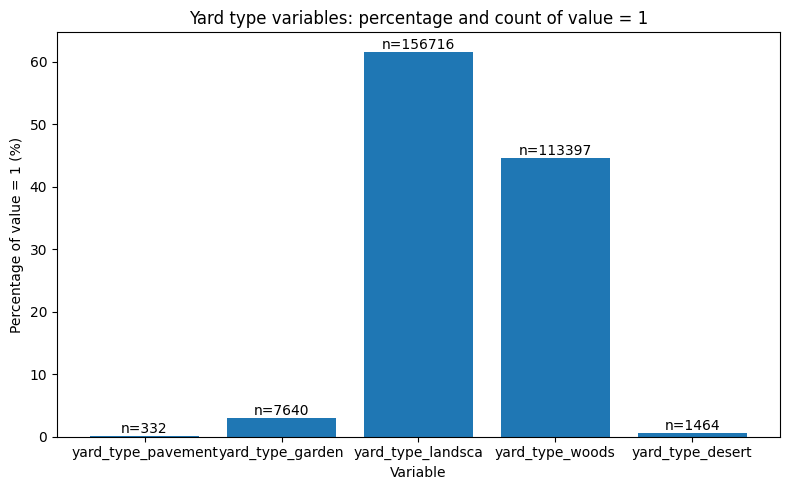

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert ratio to percentage
percent = yard_summary["ratio_1_overall"] * 100

# One single chart, using matplotlib only (no custom colors)
plt.figure(figsize=(8, 5))
bars = plt.bar(yard_summary.index, percent)

plt.xlabel("Variable")
plt.ylabel("Percentage of value = 1 (%)")
plt.title("Yard type variables: percentage and count of value = 1")

plt.xticks(rotation=0, ha="center")

# Annotate each bar with the corresponding count_1
for bar, cnt in zip(bars, yard_summary["count_1"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"n={cnt}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


2.Habitite distribution

In [39]:
print("hab:", hab_cols)
hab_summary = pd.DataFrame({
    "count_1": (df[hab_cols] == 1).sum(),
    "ratio_1_overall": (df[hab_cols] == 1).mean()
})

hab_summary

hab: ['hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard', 'hab_park', 'hab_water_fresh', 'hab_water_salt', 'hab_residential', 'hab_industrial', 'hab_agricultural', 'hab_desert_scrub', 'hab_young_woods', 'hab_swamp', 'hab_marsh']


,count_1,ratio_1_overall
hab_dcid_woods,101970,0.400896
hab_evgr_woods,43883,0.172527
hab_mixed_woods,139497,0.548434
hab_orchard,16876,0.066348
hab_park,62569,0.245991
hab_water_fresh,126263,0.496405
hab_water_salt,9036,0.035525
hab_residential,188337,0.740449
hab_industrial,43305,0.170254
hab_agricultural,73307,0.288207


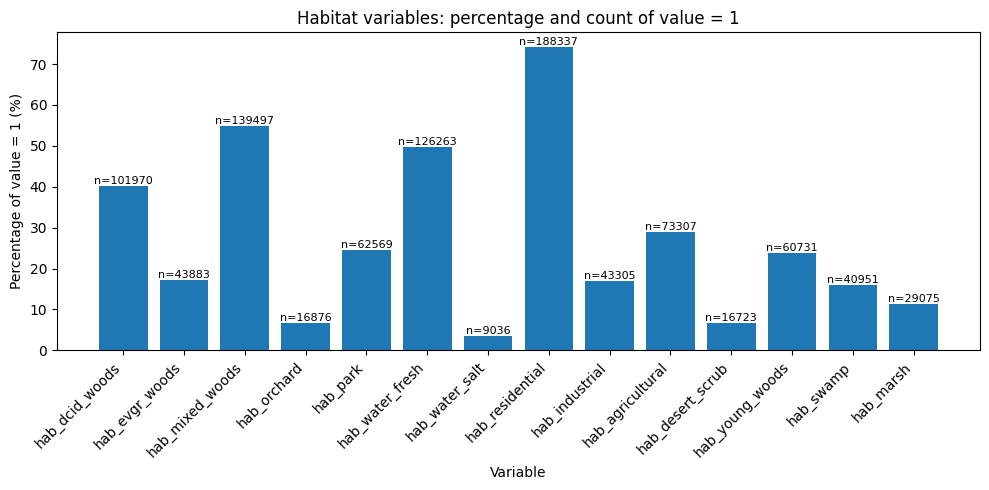

In [40]:
import matplotlib.pyplot as plt

percent = hab_summary["ratio_1_overall"] * 100

plt.figure(figsize=(10, 5))
bars = plt.bar(hab_summary.index, percent)

plt.xlabel("Variable")
plt.ylabel("Percentage of value = 1 (%)")
plt.title("Habitat variables: percentage and count of value = 1")
plt.xticks(rotation=45, ha="right")

for bar, cnt in zip(bars, hab_summary["count_1"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"n={cnt}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


3.Environmental variable distribution

In [41]:
print("environment:", environment_cols)
for col in environment_cols:
    print("=" * 60)
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))

environment: ['evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast', 'water_srcs_atleast', 'bird_baths_atleast', 'population_atleast', 'count_area_size_sq_m_atleast', 'nearby_feeders', 'housing_density']
Column: evgr_trees_atleast
evgr_trees_atleast
4.0     94767
1.0     64503
11.0    47960
0.0     26482
3.0     20643
Name: count, dtype: int64
Column: evgr_shrbs_atleast
evgr_shrbs_atleast
4.0     95843
1.0     58883
11.0    40571
0.0     40089
3.0     18969
Name: count, dtype: int64
Column: dcid_trees_atleast
dcid_trees_atleast
11.0    107790
4.0      73134
1.0      40674
3.0      23886
0.0       8871
Name: count, dtype: int64
Column: dcid_shrbs_atleast
dcid_shrbs_atleast
11.0    99354
4.0     66882
1.0     46353
0.0     20997
3.0     20769
Name: count, dtype: int64
Column: fru_trees_atleast
fru_trees_atleast
1.0     136035
4.0      50128
0.0      48973
11.0     17113
3.0       2106
Name: count

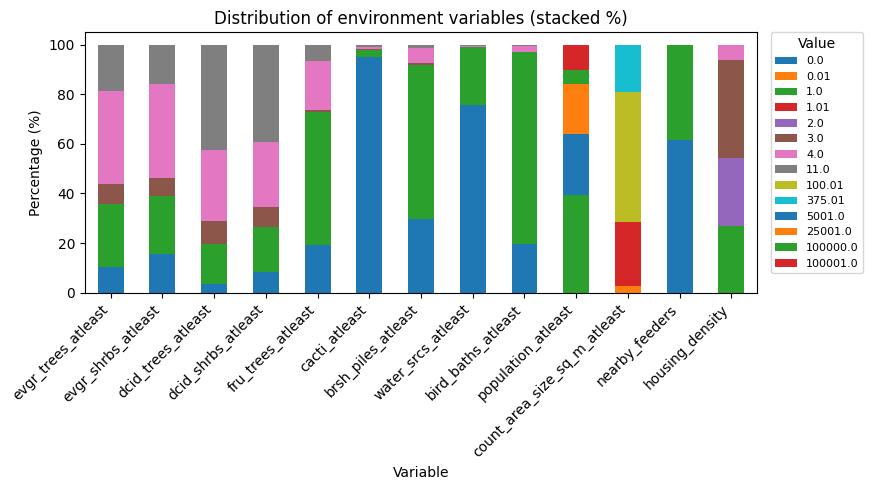

In [42]:
import matplotlib.pyplot as plt

# Keep *_atleast variables + add nearby_feeders and housing_density
cols_to_plot = [c for c in environment_cols if c.endswith("_atleast")] + [
    "nearby_feeders",
    "housing_density"
]

# Build percentage distribution table
dist_table = (
    df[cols_to_plot]
    .apply(lambda s: s.value_counts(normalize=True))
    .fillna(0)
    * 100
)

# Sort the value levels on the x-axis
dist_table = dist_table.sort_index()

# Plot
ax = dist_table.T.plot(
    kind="bar",
    stacked=True,
    figsize=(11, 5)
)

plt.xlabel("Variable")
plt.ylabel("Percentage (%)")
plt.title("Distribution of environment variables (stacked %)")
plt.xticks(rotation=45, ha="right")

# Move legend outside the plot (right side)
plt.legend(
    title="Value",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    fontsize=8
)

# Leave space on the right for the legend
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()


4.Disturbance distribution

In [43]:
print("disturbance:", disturbance_cols)
disturbance_summary = pd.DataFrame({
    "count_1": (df[disturbance_cols] == 1).sum(),
    "ratio_1_overall": (df[disturbance_cols] == 1).mean()
})
disturbance_summary


disturbance: ['squirrels', 'cats', 'dogs', 'humans']


,count_1,ratio_1_overall
squirrels,209032,0.821812
cats,155848,0.612718
dogs,155140,0.609935
humans,212472,0.835336


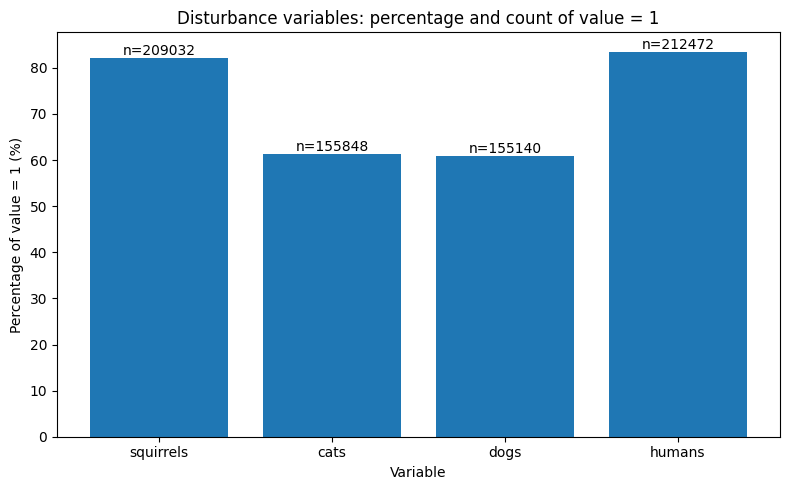

In [44]:
import matplotlib.pyplot as plt

# Convert ratio to percentage
percent = disturbance_summary["ratio_1_overall"] * 100

# One single chart, using matplotlib only (no custom colors)
plt.figure(figsize=(8, 5))
bars = plt.bar(disturbance_summary.index, percent)

plt.xlabel("Variable")
plt.ylabel("Percentage of value = 1 (%)")
plt.title("Disturbance variables: percentage and count of value = 1")



plt.xticks(rotation=0, ha="center")
# Annotate each bar with the corresponding count_1
for bar, cnt in zip(bars, disturbance_summary["count_1"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"n={cnt}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


5.Feed time distribution

In [45]:
print("feeding time:", feeding_time_cols)
feeding_time_summary = pd.DataFrame({
    "count_1": (df[feeding_time_cols] == 1).sum(),
    "ratio_1_overall": (df[feeding_time_cols] == 1).mean()
})

feeding_time_summary


feeding time: ['fed_yr_round', 'fed_in_jan', 'fed_in_feb', 'fed_in_mar', 'fed_in_apr', 'fed_in_may', 'fed_in_jun', 'fed_in_jul', 'fed_in_aug', 'fed_in_sep', 'fed_in_oct', 'fed_in_nov', 'fed_in_dec']


,count_1,ratio_1_overall
fed_yr_round,63463,0.249506
fed_in_jan,182951,0.719274
fed_in_feb,182534,0.717635
fed_in_mar,181902,0.715150
fed_in_apr,173608,0.682542
fed_in_may,147446,0.579686
fed_in_jun,133787,0.525985
fed_in_jul,128508,0.505231
fed_in_aug,129258,0.508180
fed_in_sep,142574,0.560532


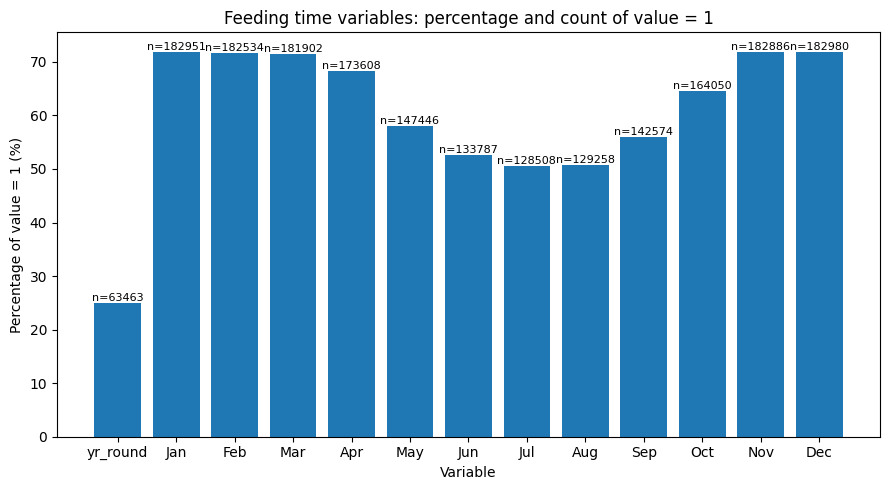

In [46]:
import matplotlib.pyplot as plt

percent = feeding_time_summary["ratio_1_overall"] * 100

plt.figure(figsize=(9, 5))
bars = plt.bar(feeding_time_summary.index, percent)

plt.xlabel("Variable")
plt.ylabel("Percentage of value = 1 (%)")
plt.title("Feeding time variables: percentage and count of value = 1")

# build short labels for x-axis
short_labels = []
for name in feeding_time_summary.index:
    if name == "fed_yr_round":
        short_labels.append("yr_round")
    else:
        # fed_in_jan -> jan -> Jan
        short_labels.append(name.replace("fed_in_", "").capitalize())

plt.xticks(
    ticks=range(len(feeding_time_summary.index)),
    labels=short_labels,
    rotation=0,
    ha="center"
)


for bar, cnt in zip(bars, feeding_time_summary["count_1"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"n={cnt}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


6.Distribution of the number of different types of feeders

In [47]:
print("num_diff_types_feeder:", feeder_cols)
for col in feeder_cols:
    print("=" * 60)
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))


num_diff_types_feeder: ['numfeeders_suet', 'numfeeders_ground', 'numfeeders_hanging', 'numfeeders_platfrm', 'numfeeders_humming', 'numfeeders_water', 'numfeeders_thistle', 'numfeeders_fruit', 'numfeeders_hopper', 'numfeeders_tube', 'numfeeders_other']
Column: numfeeders_suet
numfeeders_suet
1.0        104526
2.0         64283
0.0         47385
3.0         22933
4.0          9137
5.0          3223
6.0          1933
7.0           354
8.0           264
10.0          102
9.0            85
11.0           41
12.0           33
13.0           10
14.0           10
21.0            5
15.0            4
20.0            3
33.0            2
30.0            2
16.0            2
23.0            2
25.0            2
34.0            1
32.0            1
28.0            1
117.0           1
31.0            1
45.0            1
14850.0         1
17.0            1
22.0            1
54.0            1
24.0            1
48.0            1
19.0            1
64.0            1
Name: count, dtype: int64
Column: numfeede

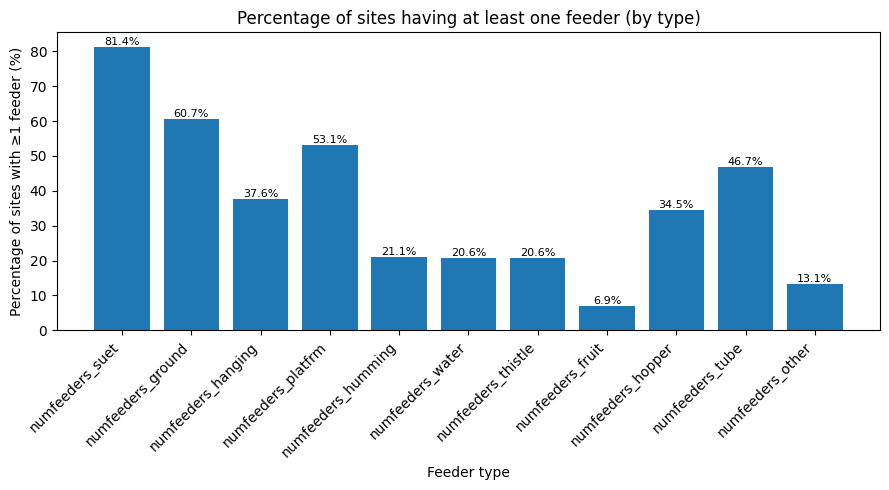

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

has_feeder_ratio = (df[feeder_cols] >= 1).mean() * 100

plt.figure(figsize=(9,5))
bars = plt.bar(has_feeder_ratio.index, has_feeder_ratio.values)

plt.ylabel("Percentage of sites with ≥1 feeder (%)")
plt.xlabel("Feeder type")
plt.title("Percentage of sites having at least one feeder (by type)")

plt.xticks(rotation=45, ha="right")

for bar, val in zip(bars, has_feeder_ratio.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{val:.1f}%",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


##(5)Correlation heatmap

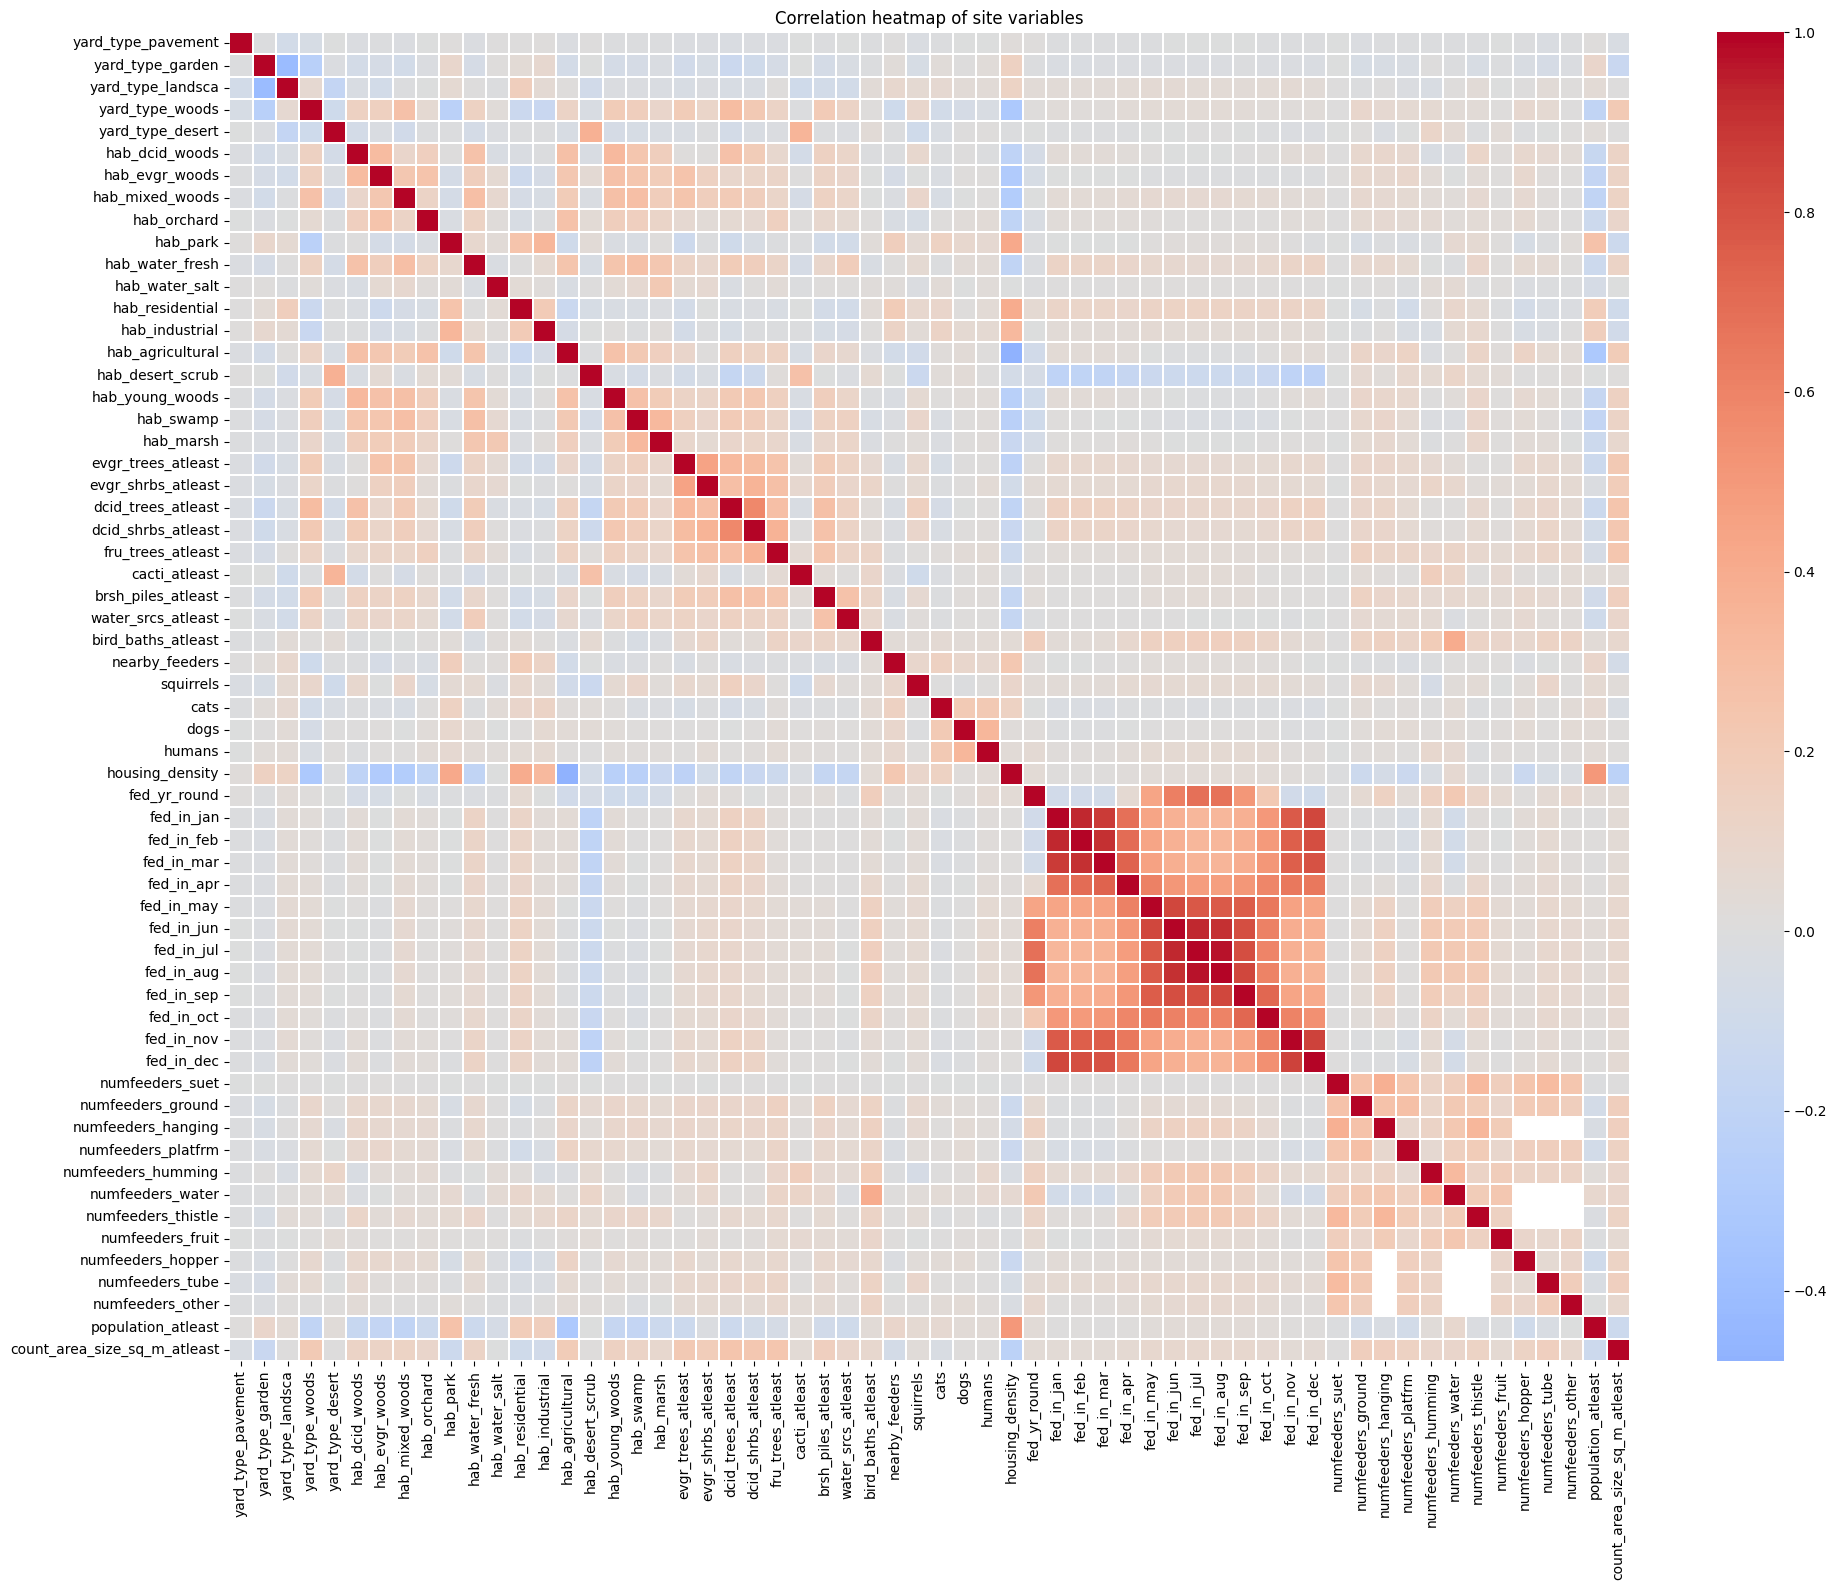

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/PFW_count_site_data_public_2021.csv")

df_num = df.select_dtypes(include="number")

corr = df_num.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.1
)

plt.title("Correlation heatmap of site variables")
plt.tight_layout()
plt.show()


#4.EDA after combining tables  

Merge tables by loc_id

In [50]:
import pandas as pd
# df1: observation results

df1 = pd.read_csv("/content/PFW_OBS_clean.csv")

# time rivise
df1["timestamp"] = pd.to_datetime(df1["timestamp"])
df1["Year"] = df1["timestamp"].dt.year

# aggregate to checklist level first
sub_level = (
    df1.groupby(["loc_id", "sub_id"], as_index=False)
       .agg(
           n_species=("species_code", "nunique"),
           total_birds=("how_many", "sum"),
           Year=("Year", "first")
       )
)

# aggregate to site level
site_level = (
    sub_level.groupby("loc_id", as_index=False)
             .agg(
                 avg_species=("n_species", "mean"),
                 avg_birds=("total_birds", "mean"),
                 Year=("Year", "first")
             )
)


# df2: habitat / yard data

df2 = pd.read_csv("/content/PFW_SITE_clean.csv")

# print columns once to check real names
print("df2 columns:", df2.columns.tolist())

# find the proj_period_id column (case-insensitive)
cols_lower = {c.strip().lower(): c for c in df2.columns}
proj_col = cols_lower.get("proj_period_id")

if proj_col is None:
    raise KeyError("Column proj_period_id is not found in df2.")

# keep only PFW_2021 to match df1 (Year = 2021)
df2[proj_col] = df2[proj_col].astype(str).str.strip()
df2_2021 = df2[df2[proj_col] == "PFW_2021"].copy()


# merge by loc_id

merged = site_level.merge(
    df2_2021,
    on="loc_id",
    how="left"
)

# quick alignment check
print("Number of sites in df1:", site_level["loc_id"].nunique())
print("Number of sites in df2 (PFW_2021):", df2_2021["loc_id"].nunique())
print("Number of matched sites:", merged[proj_col].notna().sum())

merged.head()


df2 columns: ['loc_id', 'proj_period_id', 'yard_type_pavement', 'yard_type_garden', 'yard_type_landsca', 'yard_type_woods', 'yard_type_desert', 'hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard', 'hab_park', 'hab_water_fresh', 'hab_water_salt', 'hab_residential', 'hab_industrial', 'hab_agricultural', 'hab_desert_scrub', 'hab_young_woods', 'hab_swamp', 'hab_marsh', 'evgr_trees_atleast', 'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast', 'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast', 'water_srcs_atleast', 'bird_baths_atleast', 'nearby_feeders', 'squirrels', 'cats', 'dogs', 'humans', 'housing_density', 'fed_yr_round', 'fed_in_jan', 'fed_in_feb', 'fed_in_mar', 'fed_in_apr', 'fed_in_may', 'fed_in_jun', 'fed_in_jul', 'fed_in_aug', 'fed_in_sep', 'fed_in_oct', 'fed_in_nov', 'fed_in_dec', 'numfeeders_suet', 'numfeeders_ground', 'numfeeders_hanging', 'numfeeders_platfrm', 'numfeeders_humming', 'numfeeders_water', 'numfeeders_thistle', 'numfeeders_fru

,loc_id,avg_species,avg_birds,Year,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,hab_orchard,hab_park,hab_water_fresh,hab_water_salt,hab_residential,hab_industrial,hab_agricultural,hab_desert_scrub,hab_young_woods,hab_swamp,hab_marsh,evgr_trees_atleast,...,fed_in_jan,fed_in_feb,fed_in_mar,fed_in_apr,fed_in_may,fed_in_jun,fed_in_jul,fed_in_aug,fed_in_sep,fed_in_oct,fed_in_nov,fed_in_dec,numfeeders_suet,numfeeders_ground,numfeeders_hanging,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L100032,1.333333,3.166667,2020,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,5001.0,100.01
1,L100057,1.555556,6.333333,2020,PFW_2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,5001.0,375.01
2,L10007061,1.000000,2.166667,2020,PFW_2021,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5001.0,1.01
3,L10011691,1.100000,4.900000,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L1001179,1.000000,10.400000,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
merged.to_csv("/content/merged_on_site.csv", index=False)

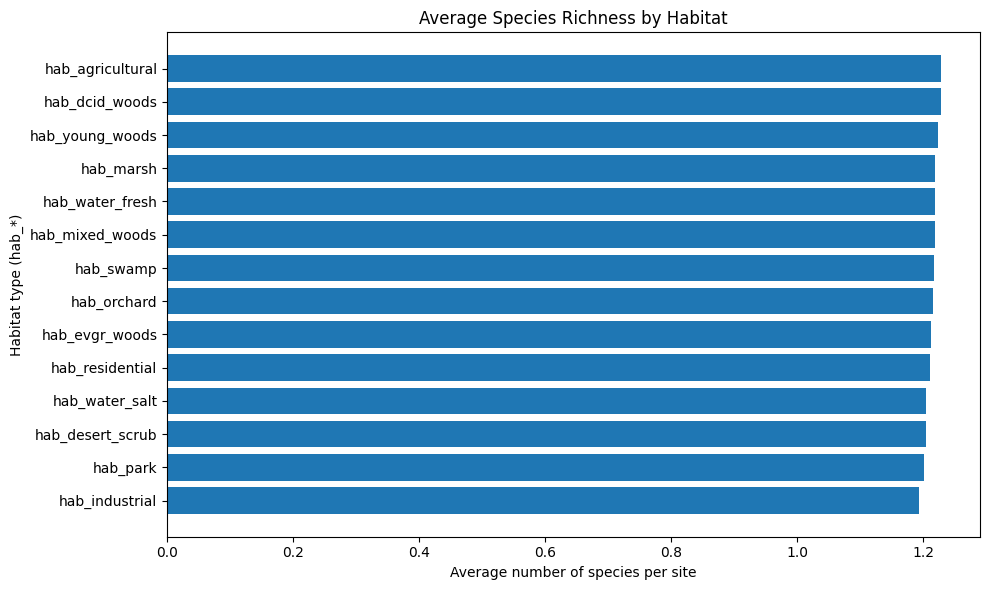

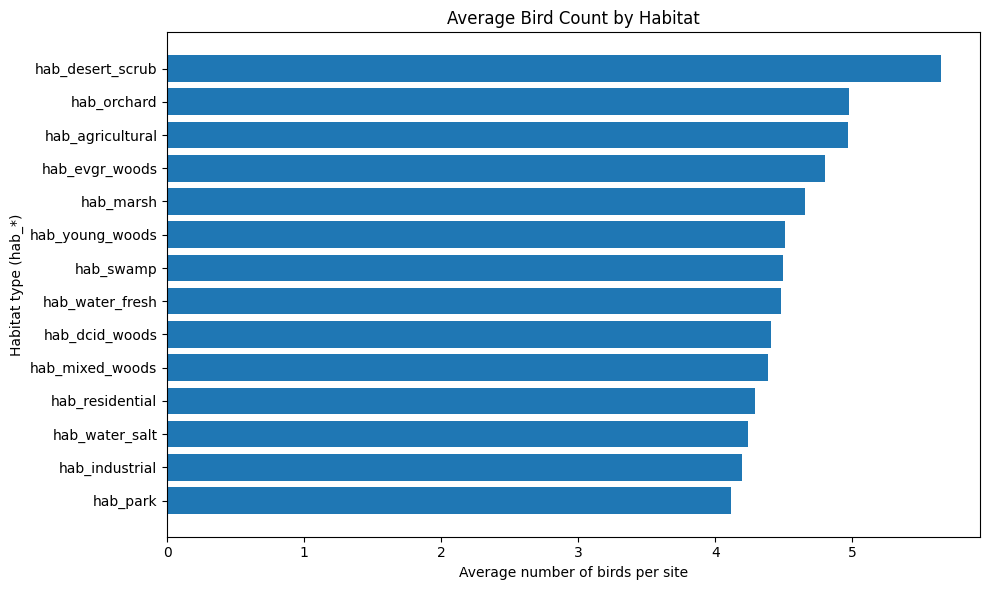

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


# 1) Load merged dataset

merged_path = "/content/merged_on_site.csv"
merged = pd.read_csv(merged_path)


# 2) Identify habitat columns
hab_cols = [c for c in merged.columns if c.lower().startswith("hab_")]


# 3) Build habitat summary
rows = []

for col in hab_cols:
    sub = merged[merged[col] == 1]

    rows.append({
        "habitat": col,
        "avg_species": sub["avg_species"].mean(),
        "avg_birds": sub["avg_birds"].mean(),
        "n_sites": sub.shape[0]
    })

hab_summary = pd.DataFrame(rows)

# Sort for nicer plots
hab_summary_species = hab_summary.sort_values("avg_species", ascending=True)
hab_summary_birds   = hab_summary.sort_values("avg_birds", ascending=True)


# 4) Plot: average species by habitat

plt.figure(figsize=(10, 6))
plt.barh(hab_summary_species["habitat"],
         hab_summary_species["avg_species"])
plt.xlabel("Average number of species per site")
plt.ylabel("Habitat type (hab_*)")
plt.title("Average Species Richness by Habitat")
plt.tight_layout()
plt.show()


# 5) Plot: average birds by habitat
plt.figure(figsize=(10, 6))
plt.barh(hab_summary_birds["habitat"],
         hab_summary_birds["avg_birds"])
plt.xlabel("Average number of birds per site")
plt.ylabel("Habitat type (hab_*)")
plt.title("Average Bird Count by Habitat")
plt.tight_layout()
plt.show()

The average number of species across different habitats was nearly identical, clustering around approximately 1.2 overall. This indicates that habitat type had no discernible effect on species richness within this dataset.  

The average number of birds observed differed markedly between habitats. Sites within desert scrub, agricultural land, and orchards recorded higher average bird counts, whereas parks, industrial estates, and saline water bodies exhibited comparatively lower average bird numbers. This indicates that habitat type strongly influences bird abundance.

Merge by each checklist (observation)

In [53]:
import pandas as pd


# 1. load data
df1 = pd.read_csv("/content/PFW_OBS_clean.csv")
df2 = pd.read_csv("/content/PFW_SITE_clean.csv")

# time rivise
df1["timestamp"] = pd.to_datetime(df1["timestamp"])
df1["Year"] = df1["timestamp"].dt.year

# 2. make column names case-insensitive

df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()


# 3. build proj_period_id in df1
df.rename(columns={"PROJ_PERIOD_ID": "proj_period_id"}, inplace=True)

# 4. make sure join keys exist

required_cols_df1 = {"loc_id", "proj_period_id"}
required_cols_df2 = {"loc_id", "proj_period_id"}

if not required_cols_df1.issubset(df1.columns):
    raise KeyError("df1 is missing join keys.")

if not required_cols_df2.issubset(df2.columns):
    raise KeyError("df2 is missing join keys.")

# 5. merge (keep all df1 rows)

merged_on_checklist = df1.merge(
    df2,
    on=["loc_id", "proj_period_id"],
    how="left",
    suffixes=("", "_site")
)


# 6. quick check
print("rows in df1:", df1.shape[0])
print("rows after merge:", merged_on_checklist.shape[0])

merged_on_checklist.head()

rows in df1: 99343
rows after merge: 99343


,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,proj_period_id,species_code,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,data_entry_method,timestamp,year,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,...,fed_in_jan,fed_in_feb,fed_in_mar,fed_in_apr,fed_in_may,fed_in_jun,fed_in_jul,fed_in_aug,fed_in_sep,fed_in_oct,fed_in_nov,fed_in_dec,numfeeders_suet,numfeeders_ground,numfeeders_hanging,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L981010,52.129760,-122.135470,CA-BC,POSTCODE LAT/LONG LOOKUP,S83206450,OBS1092604618,PFW_2021,amegfi,20,1,0,1,0,1,0,1.001,5.0,PFW Web 4.1.4,2021-03-04,2021,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,100.01
1,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,PFW_2021,moudov,11,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4,2020-12-19,2020,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,4.0,0.0,5001.0,375.01
2,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,PFW_2021,tuftit,2,1,0,1,1,1,1,8.001,5.0,PFW Web 4.1.4,2021-02-13,2021,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,0.0,5001.0,100.01
3,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,PFW_2021,houspa,2,1,0,1,1,1,1,4.001,0.0,PFW Web 4.1.4,2021-01-13,2021,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,5001.0,100.01
4,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,PFW_2021,balori,10,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4,2021-01-11,2021,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0,3.0,3.0,25001.0,375.01


In [54]:
merged_on_checklist.to_csv("/content/merged_on_checklist.csv", index=False)

Top habitats by #observations:
hab_residential 71168
hab_mixed_woods 53314
hab_water_fresh 46914
hab_dcid_woods 37185
hab_park 28770
hab_agricultural 26423
hab_young_woods 25214
hab_swamp 16803

Top species shown: ['norcar', 'dowwoo', 'daejun', 'moudov', 'houfin', 'bkcchi', 'blujay', 'amegfi', 'whbnut', 'tuftit'] ...


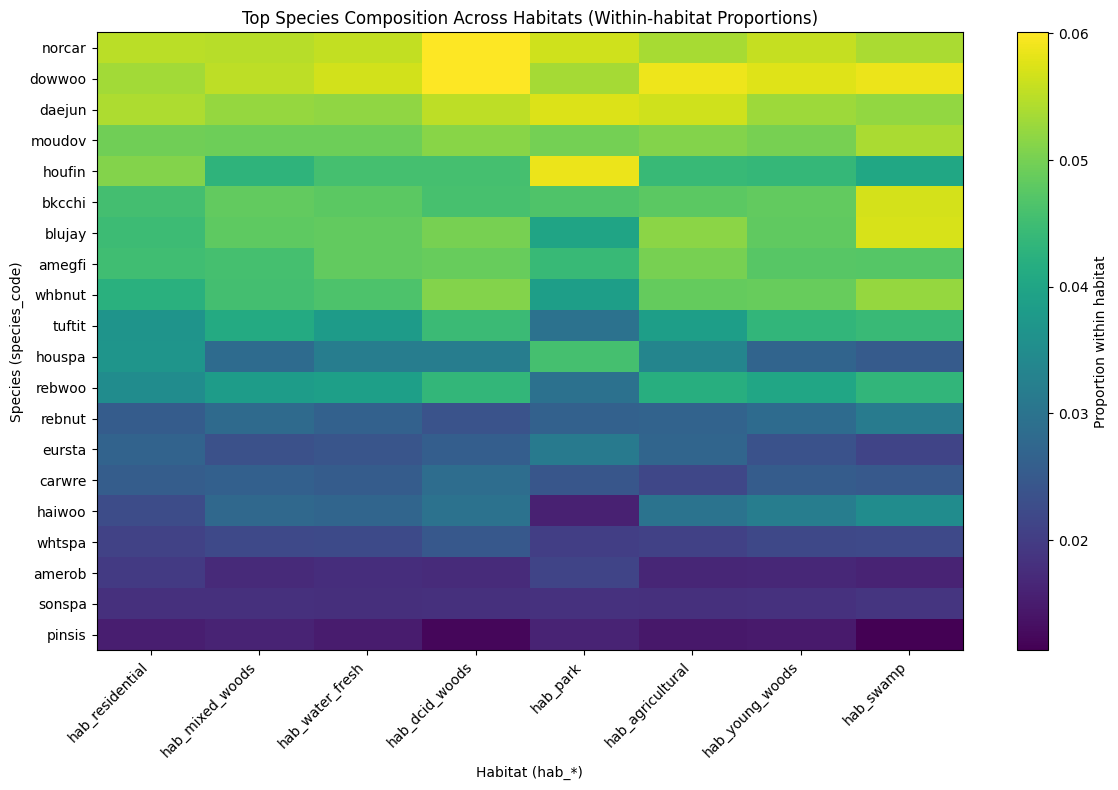

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load observation-level merged dataset
# If your file is in /content, change the path accordingly.
path = "/content/merged_on_checklist.csv"   # <-- change if needed
df = pd.read_csv(path)

# Make column names case-insensitive
df.columns = df.columns.str.strip().str.lower()

# Basic sanity checks
required = {"loc_id", "species_code"}
missing = required - set(df.columns)
if missing:
    raise KeyError(f"Missing required columns: {missing}")


# 2) Identify habitat columns
hab_cols = [c for c in df.columns if c.startswith("hab_")]
if len(hab_cols) == 0:
    raise KeyError("No habitat columns found (hab_*).")

# Optional: keep only valid observations if the column exists
if "valid" in df.columns:
    df = df[df["valid"] == 1].copy()


# 3) Choose top K habitats by number of observations (hab == 1)
K = 8   # number of habitats to compare
hab_sizes = {h: int((df[h] == 1).sum()) for h in hab_cols}
top_habs = sorted(hab_sizes, key=hab_sizes.get, reverse=True)[:K]

print("Top habitats by #observations:")
for h in top_habs:
    print(h, hab_sizes[h])


# 4) Choose top N species overall within selected habitats
N = 20  # number of species to show

df_sel = df[df[top_habs].eq(1).any(axis=1)].copy()
top_species = df_sel["species_code"].value_counts().head(N).index.tolist()

print("\nTop species shown:", top_species[:10], "...")


# 5) Build a species x habitat matrix of within-habitat proportions
#    proportion = count(species in habitat) / total observations in habitat

mat = []
for h in top_habs:
    sub = df[df[h] == 1]
    denom = len(sub)
    counts = sub["species_code"].value_counts()
    row = [(counts.get(sp, 0) / denom) if denom > 0 else 0 for sp in top_species]
    mat.append(row)

# mat currently: habitats x species -> convert to species x habitats
mat = np.array(mat).T

heat_df = pd.DataFrame(mat, index=top_species, columns=top_habs)


# 6) Plot heatmap (matplotlib only)

plt.figure(figsize=(12, 8))
im = plt.imshow(heat_df.values, aspect="auto")  # no manual colors

plt.colorbar(im, label="Proportion within habitat")

plt.xticks(ticks=np.arange(len(top_habs)), labels=top_habs, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(top_species)), labels=top_species)

plt.title("Top Species Composition Across Habitats (Within-habitat Proportions)")
plt.xlabel("Habitat (hab_*)")
plt.ylabel("Species (species_code)")
plt.tight_layout()
plt.show()


#Analysis 1: Clustering of site feeding intensity characteristics

In [10]:
!pip -q install kmodes

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

CSV_PATH = "/content/PFW_SITE_clean.csv"
SAMPLE_N = 20000
K_VALUES = [2, 3, 4, 5, 6, 7, 8]
RANDOM_STATE = 42

# import data
raw = pd.read_csv(CSV_PATH)
print(f"Loaded: {raw.shape[0]} rows x {raw.shape[1]} cols")

month_cols = [c for c in raw.columns if c.startswith("fed_in_")]
if len(month_cols) == 0:
    raise ValueError("No columns starting with 'fed_in_' found.")

id_cols = [c for c in ["loc_id", "proj_period_id"] if c in raw.columns]

# Sampling
n = min(SAMPLE_N, len(raw))
sample_idx = raw.sample(n=n, random_state=RANDOM_STATE).index
sample_df = raw.loc[sample_idx].copy()

X = sample_df[month_cols].copy()

# Missing value filled with mode
for c in month_cols:
    mode_vals = X[c].mode(dropna=True)
    fill_val = mode_vals.iloc[0] if len(mode_vals) > 0 else 0
    X[c] = X[c].fillna(fill_val).astype(int)

# KModes str ；silhouette numpy
X_fit = X.astype(str).to_numpy()
X_eval = X.to_numpy()

# find K
rows = []
best = None

for k in K_VALUES:
    km = KModes(
        n_clusters=k,
        init="Huang",
        n_init=5,
        max_iter=60,
        random_state=RANDOM_STATE,
        verbose=0,
    )
    labels = km.fit_predict(X_fit)

    sil = silhouette_score(
        X_eval,
        labels,
        metric="hamming",
        sample_size=min(5000, len(X_eval)),
        random_state=RANDOM_STATE,
    )

    rec = {"k": k, "silhouette_hamming": sil, "cost": km.cost_}
    rows.append(rec)
    print(f"K={k}  silhouette={sil:.4f}  cost={km.cost_:.0f}")

    if (best is None) or (sil > best["silhouette_hamming"]) or (
        sil == best["silhouette_hamming"] and km.cost_ < best["cost"]
    ):
        best = {**rec, "labels": labels}

k_scan = pd.DataFrame(rows).sort_values(
    ["silhouette_hamming", "cost"], ascending=[False, True]
)

print("\nBest result:")
print(k_scan.head(1).to_string(index=False))

#output
sample_out = sample_df.copy()
sample_out["cluster_feed_month_only"] = best["labels"]

profile = (
    sample_out.groupby("cluster_feed_month_only")[month_cols]
    .mean(numeric_only=True)
    .round(4)
)
sizes = sample_out["cluster_feed_month_only"].value_counts().sort_index().rename("count")
profile_with_size = profile.join(sizes)

profile_with_size.to_csv("/content/cluster_profile_feed_month_only_kmodes.csv")

print("\nSaved:")
print("/content/cluster_profile_feed_month_only_kmodes.csv")


Loaded: 254355 rows x 62 cols
K=2  silhouette=0.7697  cost=21807
K=3  silhouette=0.8652  cost=7710
K=4  silhouette=0.8372  cost=6027
K=5  silhouette=0.8412  cost=5785
K=6  silhouette=0.8294  cost=4631
K=7  silhouette=0.8337  cost=4418
K=8  silhouette=0.8519  cost=3971

Best result:
 k  silhouette_hamming   cost
 3            0.865166 7710.0

Saved:
/content/kmodes_feed_month_only_kscan.csv
/content/PFW_SITE_clustered_feed_month_only_sample.csv
/content/cluster_profile_feed_month_only_kmodes.csv


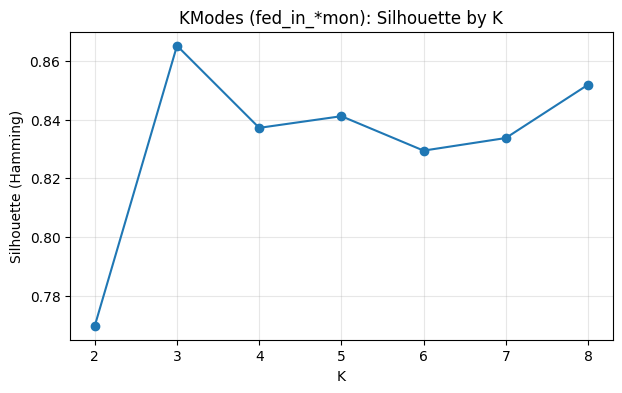

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

#silhouette score
plt.figure(figsize=(7,4))
tmp = k_scan.sort_values("k")
plt.plot(tmp["k"], tmp["silhouette_hamming"], marker="o")
plt.title("KModes (fed_in_*mon): Silhouette by K")
plt.xlabel("K")
plt.ylabel("Silhouette (Hamming)")
plt.grid(alpha=0.3)
plt.show()

I clustered sites based on monthly feeding behavior (fed_in_* variables) using the KModes algorithm, which is suitable for categorical data. After scanning K=2–8 and evaluating with silhouette score (Hamming distance), the optimal solution was K=3 (silhouette ≈ 0.865). The resulting clusters represent distinct feeding behavior patterns rather than overall ecological site types.

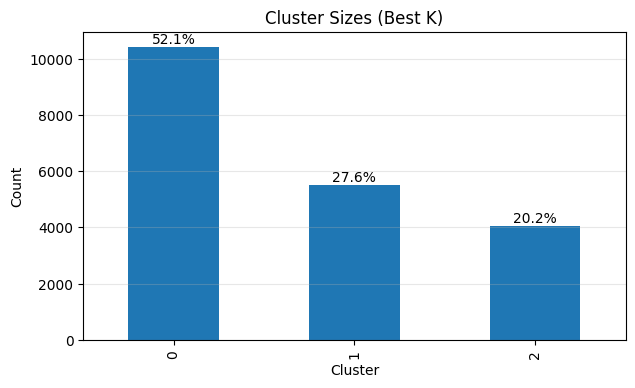

In [21]:
#cluster percentage
plt.figure(figsize=(7,4))
ax = sizes.plot(kind="bar")
plt.title("Cluster Sizes (Best K)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)

# percentage calculate
total = sizes.sum()

for i, v in enumerate(sizes):
    pct = v / total * 100
    ax.text(i, v, f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)

plt.show()

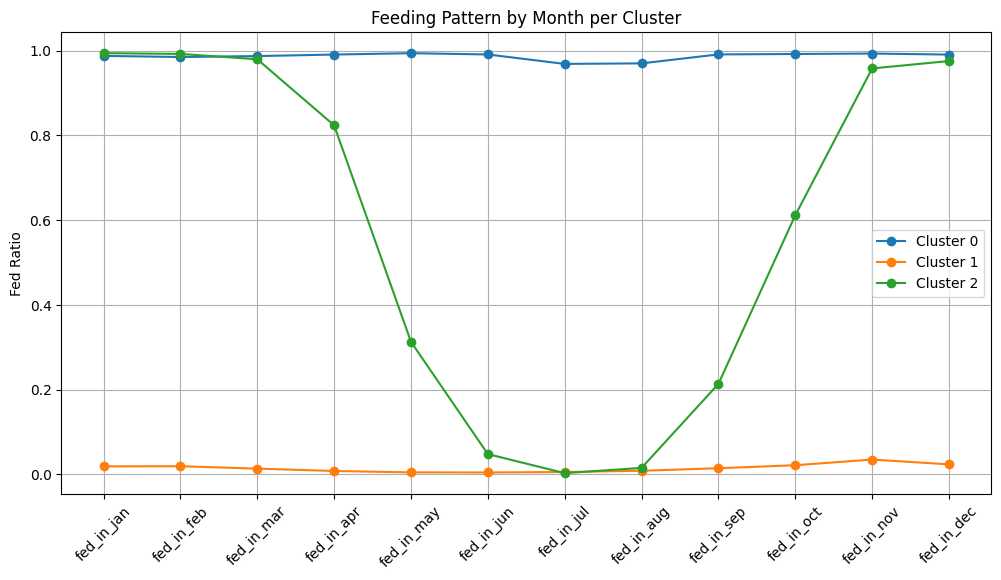

In [29]:
df = pd.read_csv("cluster_profile_feed_month_only_kmodes.csv")

month_cols = [col for col in df.columns if col.startswith("fed_in_")]

plt.figure(figsize=(12,6))

for _, row in df.iterrows():
    plt.plot(
        month_cols,
        row[month_cols],
        marker="o",
        label=f"Cluster {int(row['cluster_feed_month_only'])}"
    )

plt.xticks(rotation=45)
plt.ylabel("Fed Ratio")
plt.title("Feeding Pattern by Month per Cluster")
plt.legend()
plt.grid(True)
plt.show()

Cluster 0 (10,429, 52.1%): High-intensity feeding year-round. Monthly values ​​range from 0.97 to 0.99, with an annual average of 0.9868 and minimal seasonal fluctuations (range 0.0253).

Cluster 1 (5,522, 27.6%): Low-intensity/almost no feeding year-round. Monthly values ​​range from approximately 0.00 to 0.03, with an annual average of 0.0146.

Cluster 2 (4,049, 20.2%): Seasonal feeding (higher in winter, lower in summer). Very high from January to March (~0.98-0.99), declining from April (0.8237), reaching 0.3127 in May, 0.0477 in June, almost stopping feeding in July (0.0027), and rebounding in autumn and winter (0.6115 in October, 0.9580/0.9755 in November-December). The annual average is 0.5772, with the largest seasonal fluctuation (range 0.9914).

# Analysis2 Shannon diversity


In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 加载数据
# 读取两个CSV文件：观测数据（PFW_OBS_clean.csv）和站点信息（PFW_SITE_clean.csv）
obs  = pd.read_csv("/content/PFW_OBS_clean.csv")
site = pd.read_csv("/content/PFW_SITE_clean.csv")

# 去除列名两端的空格，并将所有列名转换为小写，便于后续处理（避免大小写不一致的问题）
obs.columns  = obs.columns.str.strip().str.lower()
site.columns = site.columns.str.strip().str.lower()

# 将观测数据中的时间戳列转换为pandas的datetime类型，无法转换的会变成NaT（Not a Time）
obs["timestamp"] = pd.to_datetime(obs["timestamp"], errors="coerce")

# 2. 计算每个检查表（checklist）的指标
# 按 sub_id, loc_id, proj_period_id, timestamp 分组（每个观测记录对应一个检查表）
# as_index=False 表示分组键不作为索引，保留为列
g = obs.groupby(["sub_id","loc_id","proj_period_id","timestamp"], as_index=False)

# 对每个分组进行聚合计算：
#   - effort_h: 取第一个有效观测时长（effort_hrs_atleast）作为该检查表的观测时长
#   - birds: 该检查表中所有鸟类的数量之和
#   - species: 该检查表中出现的不同物种代码数量（即物种丰富度）
ck = g.agg(
    effort_h=("effort_hrs_atleast","mean"),
    birds=("how_many","sum"),
    species=("species_code","nunique")
)

# 只保留观测时长大于0的记录，避免后续除零错误
ck = ck[(ck["effort_h"] > 0)]

# 计算每小时鸟类数量（鸟类丰度）和每小时物种数（物种丰富度）
ck["birds_per_hour"]   = ck["birds"] / ck["effort_h"]
ck["species_per_hour"] = ck["species"] / ck["effort_h"]

# 3. 计算每个检查表的香农多样性指数
# 按 sub_id 和 species_code 分组，计算每个物种在该检查表中的总数量
s = obs.groupby(["sub_id","species_code"])["how_many"].sum().reset_index()

# 计算每个物种在该检查表中的相对丰度 relative abundance（p = 该物种数量 / 该检查表所有物种总数）
s["p"] = s["how_many"] / s.groupby("sub_id")["how_many"].transform("sum")

# 对每个检查表，计算香农多样性指数：-Σ(p * ln(p))，忽略NaN（当p=0时，0*ln(0)定义为0）
# 将结果（一个 Series，索引index为sub_id，值为香农指数）转换为 DataFrame
sh = s.groupby("sub_id")["p"].apply(lambda x: -(x*np.log(x)).sum()).reset_index(name="shannon")

# 将香农指数合并到主数据框ck中，以sub_id为键，左连接（保留所有ck中的检查表）
# 对于没有物种出现的检查表（例如没有观测到鸟），香农指数填充为0
ck = ck.merge(sh, on="sub_id", how="left").fillna({"shannon":0})

# 从时间戳中提取月份（年-月），用于后续的月度聚合
ck["month"] = ck["timestamp"].dt.to_period("M")

# 4. 按月份计算各指标的平均值
# 按月份分组，计算 birds_per_hour, species_per_hour, shannon 的平均值
monthly = ck.groupby("month")[["birds_per_hour","species_per_hour","shannon"]].mean()

# 5. 定义喂食器密集站点聚类
# 选择 feeding 相关变量
feed_cols = [c for c in site.columns if c.startswith("fed_") or c.startswith("numfeeders_")]

X = site[feed_cols].fillna(0)

# 标准化
X_scaled = StandardScaler().fit_transform(X)

# KMeans 无监督学习
kmeans = KMeans(
    n_clusters=2,
    random_state=42,
    n_init=10
)
site["cluster"] = kmeans.fit_predict(X_scaled)

# 6. 合并站点聚类信息到检查表数据
# 确保合并键（loc_id, proj_period_id）的数据类型一致，避免因类型不匹配导致合并失败
ck["loc_id"] = ck["loc_id"].astype(str)
site["loc_id"] = site["loc_id"].astype(str)
ck["proj_period_id"] = ck["proj_period_id"].astype(str)
site["proj_period_id"] = site["proj_period_id"].astype(str)

# 左连接：将站点的聚类标签（cluster）合并到检查表数据中，以loc_id和proj_period_id为键
# 然后删除没有站点信息的检查表
ck2 = ck.merge(site[["loc_id","proj_period_id","cluster"]],
               on=["loc_id","proj_period_id"], how="left").dropna(subset=["cluster"])

# 7. 第一次计算不同聚类下的平均指标
# 按当前cluster分组，计算各指标的平均值，用于判断哪个聚类具有更高的birds_per_hour
cluster_compare = ck2.groupby("cluster")[["birds_per_hour","species_per_hour","shannon"]].mean()

# 8. 自动重标记聚类：使得cluster=1始终对应birds_per_hour更高的那组
# 找出birds_per_hour平均值较高的那个聚类编号（0或1）
higher = cluster_compare["birds_per_hour"].idxmax()
# 将ck2中的cluster列重新赋值：原来等于较高组的行设为1，否则设为0
# 这样保证了cluster=1代表喂食器密集型（因为喂食器密集应该导致更高的鸟类丰度）
# 用布尔值Boolean value判断是否属于higher
ck2["cluster"] = (ck2["cluster"] == higher).astype(int)

# 9. 重新计算聚类对比（此时cluster=1一定是鸟类丰度更高的那组）
cluster_compare = ck2.groupby("cluster")[["birds_per_hour","species_per_hour","shannon"]].mean()

# 10. 输出结果
print("Monthly trends")
print(monthly)

print("\nCluster comparison (cluster=1 = higher birds/hr, i.e., feeder-intensive)")
print(cluster_compare)

Monthly trends
         birds_per_hour  species_per_hour   shannon
month                                              
2020-11      410.383336        138.101753  0.115935
2020-12      519.681121        150.975292  0.119849
2021-01      565.399775        150.025341  0.119677
2021-02      499.325627        141.426473  0.129290
2021-03      472.554788        158.404915  0.130381
2021-04      378.142828        156.457750  0.147889

Cluster comparison (cluster=1 = higher birds/hr, i.e., feeder-intensive)
         birds_per_hour  species_per_hour   shannon
cluster                                            
0            478.573612        143.884382  0.127686
1            566.498721        197.530701  0.103438


Monthly trends were calculated for hourly bird counts, hourly species counts, and Shannon diversity. Bird activity and species detection rates peaked during midwinter months, whereas diversity exhibited weaker seasonal variation, declining in some instances even during periods of highest bird abundance. This indicates that despite higher overall winter bird numbers, observations are typically dominated by a small number of species.

Compared effort-normalized bird metrics across the two main site clusters produced by the K-Means analysis. Feeder-intensive sites consistently showed much higher birds per hour, confirming that feeding strongly increases observed abundance. However, increases in species per hour were smaller, and Shannon diversity was often lower in feeder-intensive
contexts.


Sites with limited or no feeding showed lower abundance but more balanced species composition. This comparison revealed a clear trade-off between abundance and evenness.